In [87]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat((train.loc[:,:], test.loc[:, :]))
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Data Proprocessing (Handling Missing Values)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [4]:
data.drop('Id',inplace=True,axis=1)

In [5]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
data.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [7]:
na_cols = []
for col in data.columns:
  if data[col].isna().sum() > 1400:
    na_cols.append(col)
print(len(na_cols))

7


In [8]:
for c in na_cols:
  print(data[c].value_counts(),data[c].dtype,data[c].isna().sum(),'\n')

Alley
Grvl    120
Pave     78
Name: count, dtype: int64 object 2721 

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64 object 1766 

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64 object 1420 

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64 object 2909 

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64 object 2348 

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64 object 2814 

SalePrice
140000.0    20
135000.0    17
155000.0    14
145000.0    14
190000.0    13
            ..
202665.0     1
164900.0     1
208300.0     1
181500.0     1
147500.0     1
Name: count, Length: 663, dtype: int64 float64 1459 



In [9]:
data.drop(['PoolQC','MiscFeature','Alley'],axis=1,inplace=True) # 2909 - 2841 - 2721 Nan Values
data = data.drop(["Street", "Utilities",'Fence'], axis=1)  ##data['Fence'].fillna(data['Fence'].mode(),inplace=True)

In [10]:
sale_mean = data['SalePrice'].mean()
data['SalePrice'].fillna(sale_mean,inplace=True)

In [11]:
LotFrontage_mean = data['LotFrontage'].mean()
data['LotFrontage'].fillna(LotFrontage_mean,inplace=True)

In [12]:
for col in data.columns:
  if data[col].isna().sum() == data.isna().sum().max():
    print(col)

MasVnrType


In [13]:
encode_cols = ['FireplaceQu','MasVnrType']
encoder = LabelEncoder()
for col in encode_cols:
  data[col] = encoder.fit_transform(data[col])

In [14]:
fill_cols = []
for col in data.columns:
  if data[col].isna().sum() == data.isna().sum().max():
    fill_cols.append(col)
print(fill_cols)

['GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [15]:
data['GarageYrBlt'].isna().sum()

159

In [16]:
data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

In [17]:
for col in fill_cols:
  data[col] = data[col].interpolate()

In [18]:
data['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1454    1970.0
1455    1970.0
1456    1960.0
1457    1976.5
1458    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

In [19]:
data.dropna(inplace=True)

In [20]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [21]:
data.shape

(2659, 74)

In [22]:
data.isna().sum().max()

0

### Feature Importance and Feature selection

In [23]:
df = data.copy()

In [25]:
columns = df.select_dtypes(include=['object']).columns
for col in columns:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])
    print(col, df[col].unique())


MSZoning [3 4 0 1 2]
LotShape [3 0 1 2]
LandContour [3 0 2 1]
LotConfig [4 2 0 1 3]
LandSlope [0 1 2]
Neighborhood [ 5 24  6 15 11 21 14 17  3 19 16 12 20  9 10 23  8 22  4  7 13  0  2 18
  1]
Condition1 [2 1 4 0 5 8 6 3 7]
Condition2 [2 0 7 1 4 3 6 5]
BldgType [0 1 4 2 3]
HouseStyle [5 2 0 1 6 7 4 3]
RoofStyle [1 3 2 4 0 5]
RoofMatl [1 7 3 6 2 5 4 0]
Exterior1st [11  7 12  5  2 13  4  8 10  0  1  9  6  3]
Exterior2nd [13  8 15  6 10 14  5  3 12  0  2  7  1  9 11  4]
ExterQual [2 3 0 1]
ExterCond [4 2 1 0 3]
Foundation [2 1 0 4 3]
BsmtQual [2 3 0 1]
BsmtCond [3 1 0 2]
BsmtExposure [3 1 2 0]
BsmtFinType1 [2 0 5 4 1 3]
BsmtFinType2 [5 1 0 4 3 2]
Heating [0 1 2 3]
HeatingQC [0 2 4 1 3]
CentralAir [1 0]
Electrical [4 1 0 2 3]
KitchenQual [2 3 0 1]
Functional [6 2 0 3 4 1 5]
GarageType [1 5 3 4 2 0]
GarageFinish [1 2 0]
GarageQual [4 1 2 0 3]
GarageCond [4 1 2 3 0]
PavedDrive [2 0 1]
SaleType [8 6 0 4 1 5 2 3 7]
SaleCondition [4 0 5 3 2 1]


In [27]:
price = df['SalePrice']
df.drop('SalePrice',axis=1,inplace=True)
df = df.join(price)

In [28]:
datas = df.iloc[:,:-1]
df['SalePrice'] = df['SalePrice'].astype('int64')
labels = df.iloc[:,-1]

In [29]:
xtrain , xtest , ytrain , ytest = train_test_split(datas,labels)

In [30]:
selector = RidgeCV()
selector.fit(xtrain, ytrain)

RidgeCV()

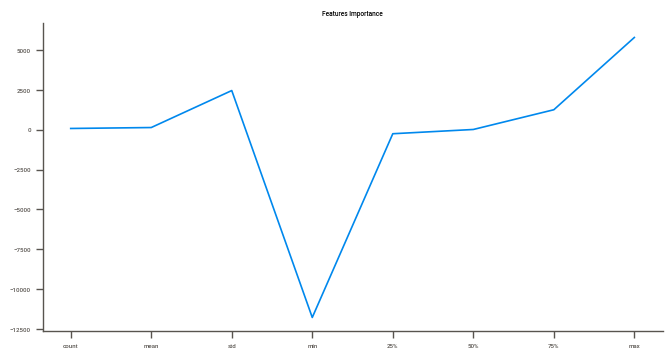

In [47]:
_df_1['Features Importance'].plot(kind='line', figsize=(8, 4), title='Features Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

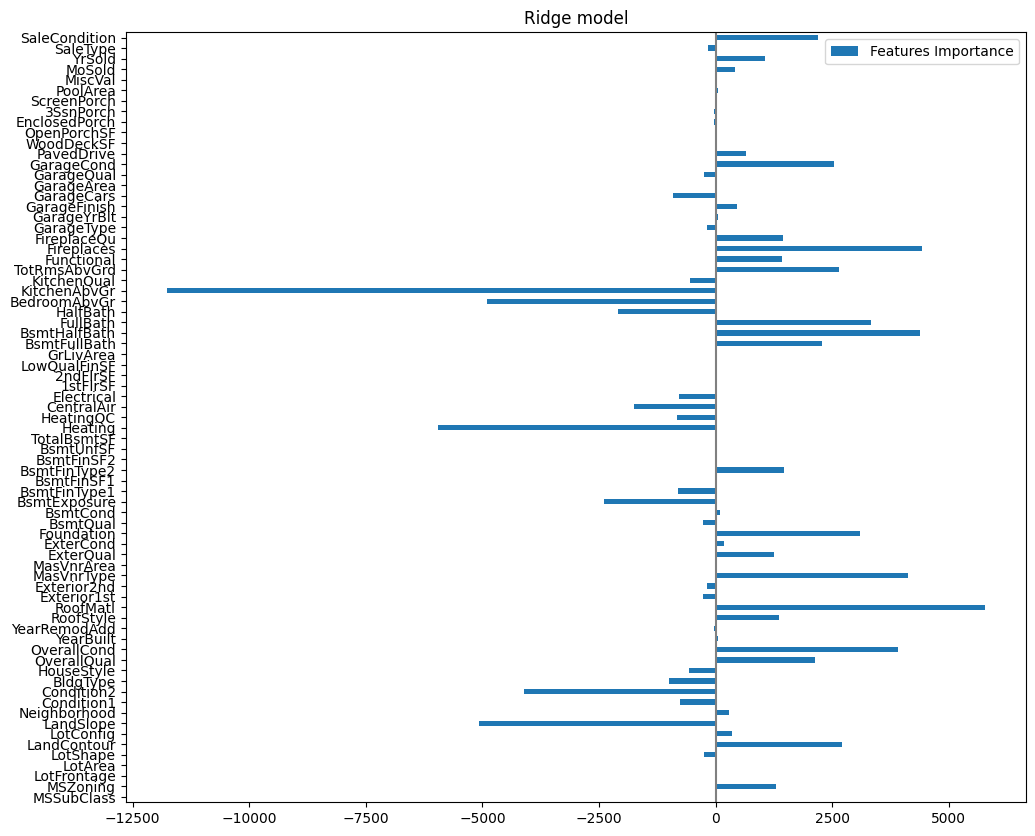

In [31]:
scores = pd.DataFrame(selector.coef_, columns=["Features Importance"], index=xtrain.columns)
scores.plot(kind="barh", figsize=(15, 10))
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

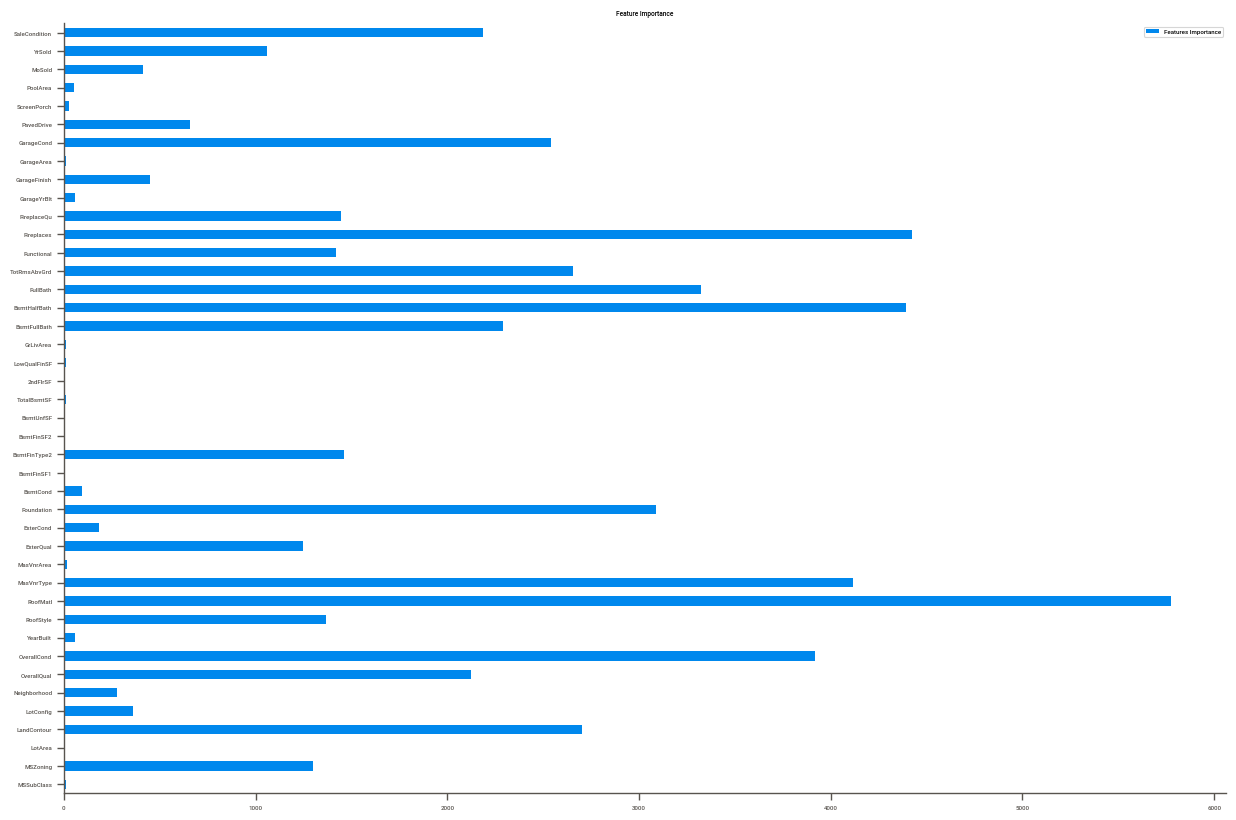

In [55]:
importance_cols = scores[scores['Features Importance'] > 0].T.columns
scores[scores['Features Importance'] > 0].plot(kind='barh', figsize=(15, 10), title='Feature Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
df = df[importance_cols]
df = df.join(labels)

## Exploratory Data Analysis

In [58]:
df.drop(['YearBuilt','YrSold'],axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotArea,LandContour,LotConfig,Neighborhood,OverallQual,OverallCond,RoofStyle,RoofMatl,...,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,ScreenPorch,PoolArea,MoSold,SaleCondition,SalePrice
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,180921
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,180921
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500


                                             |          | [  0%]   00:00 -> (? left)


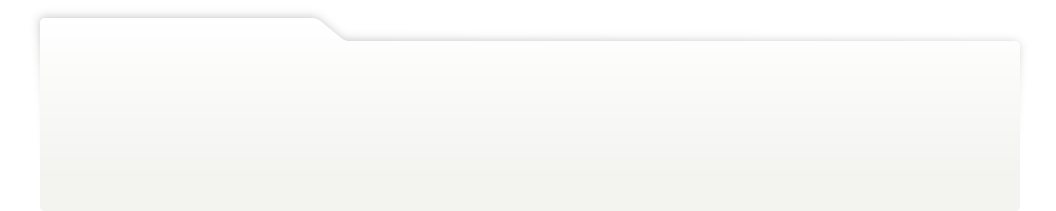
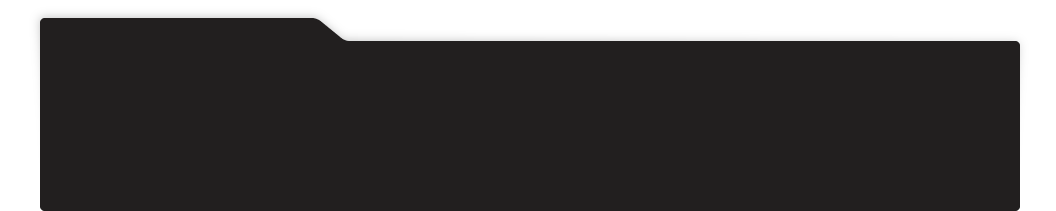
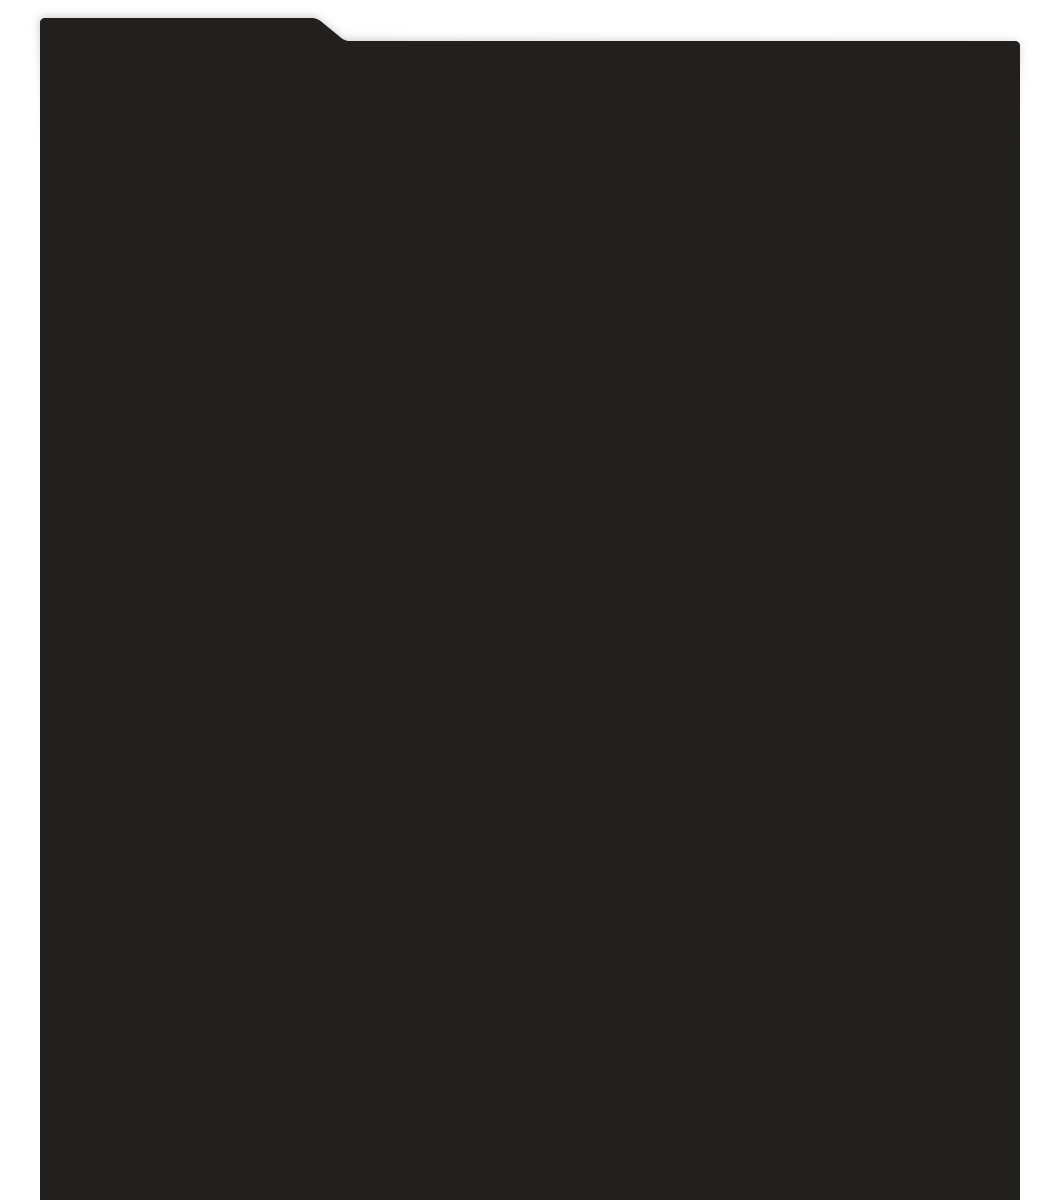
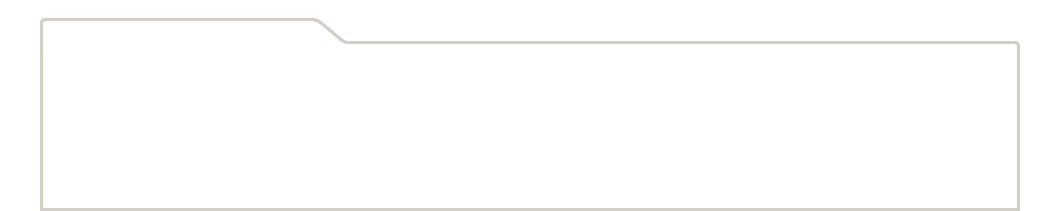
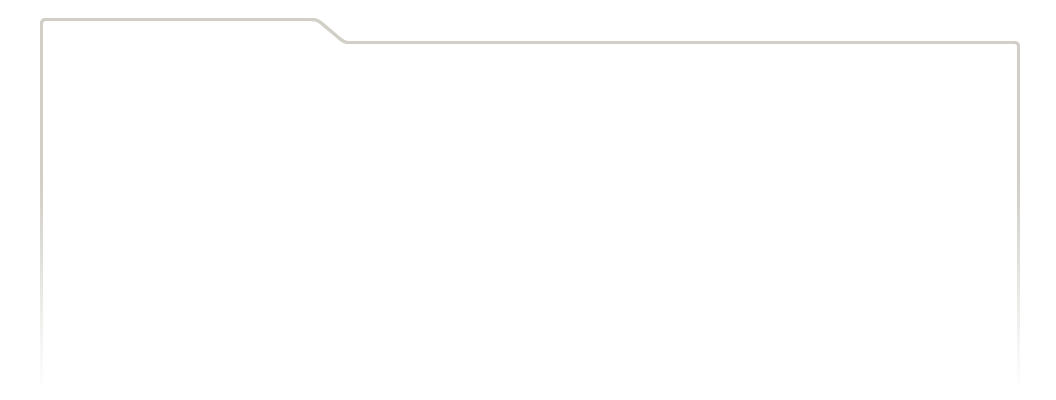
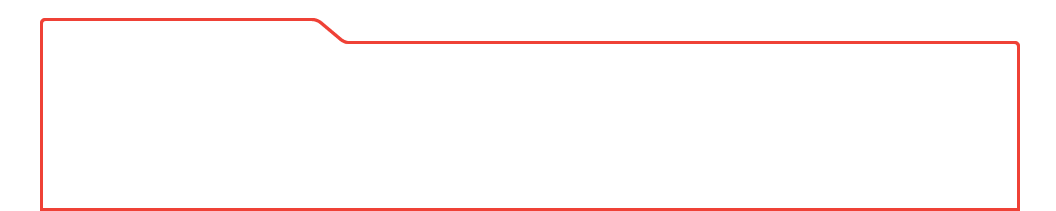
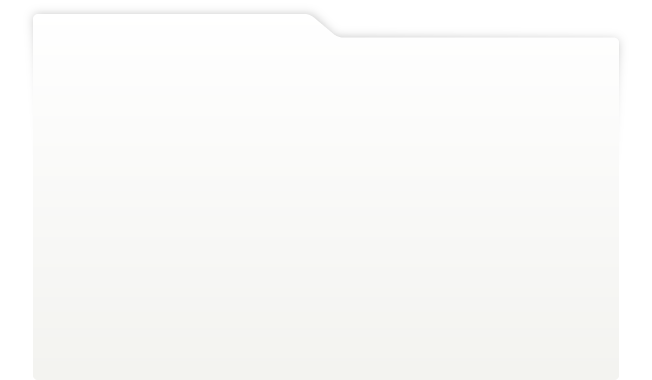
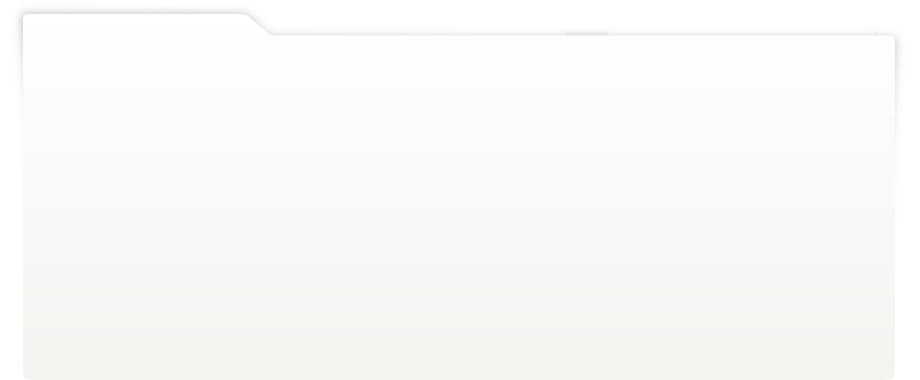
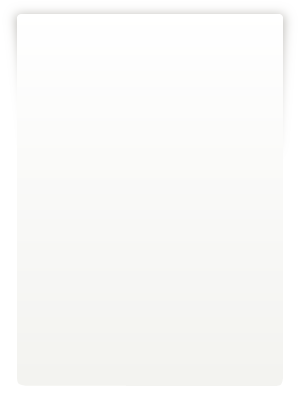
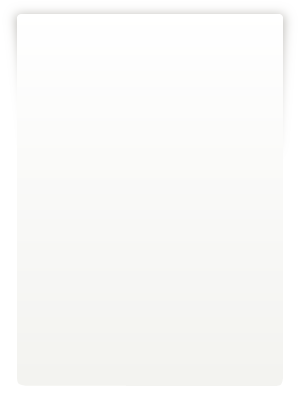
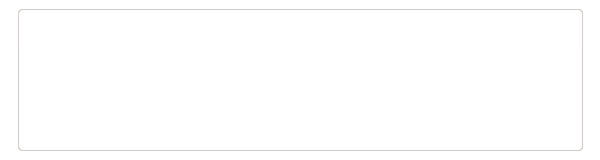
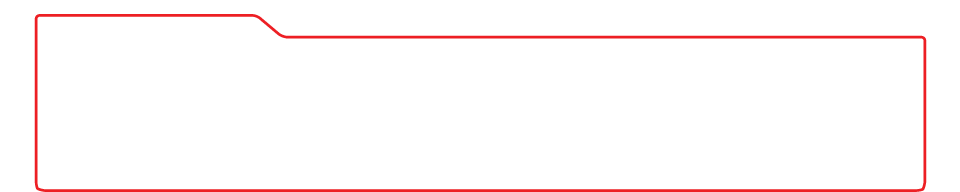
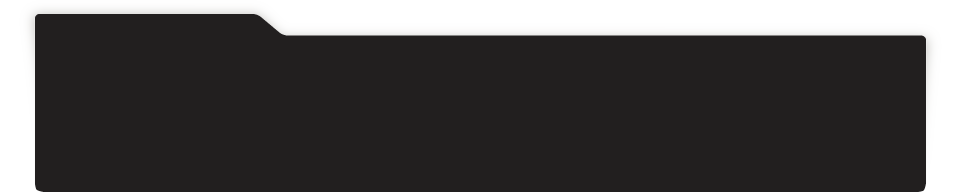
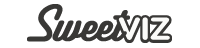
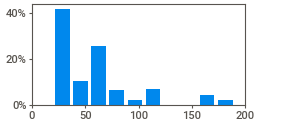
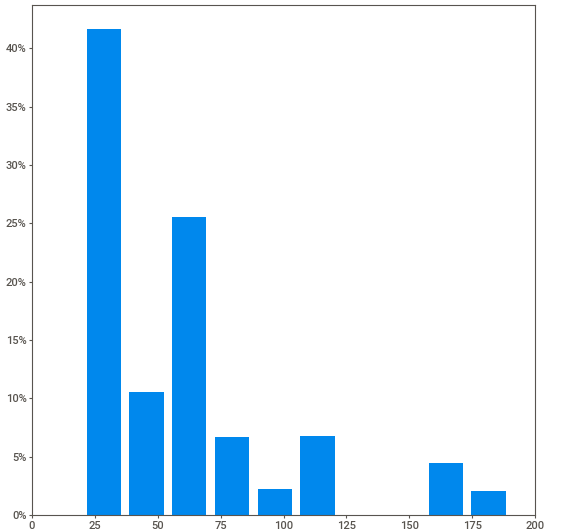
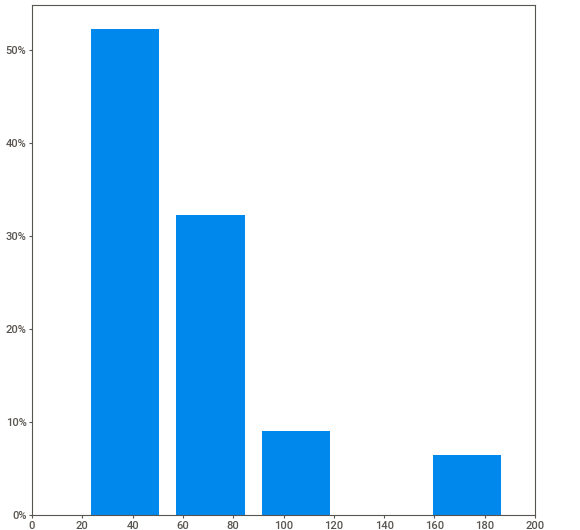
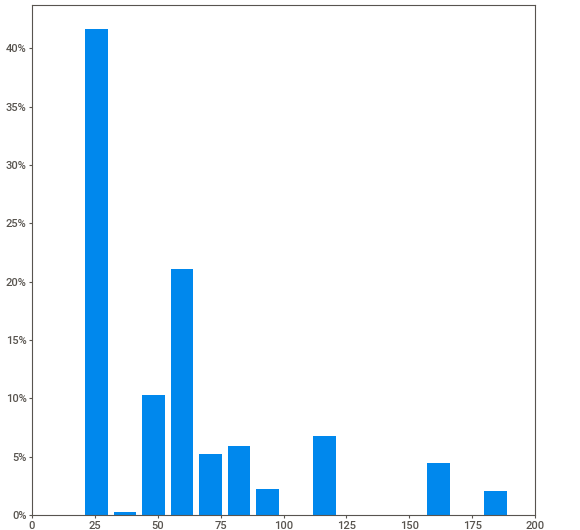
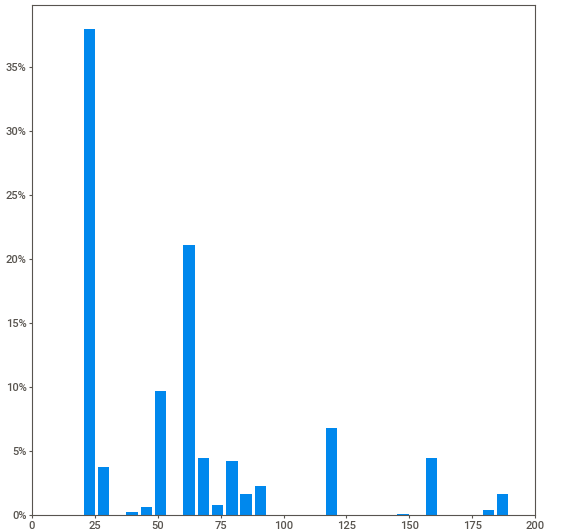
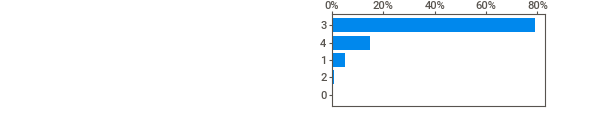
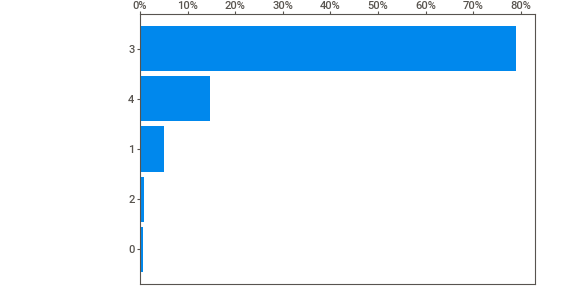
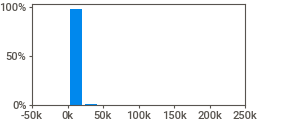
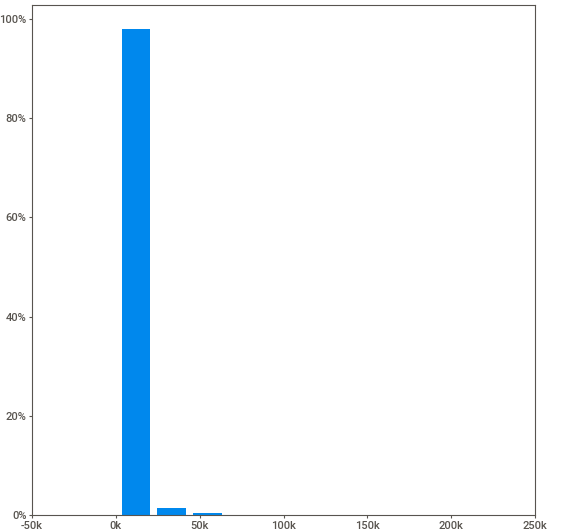
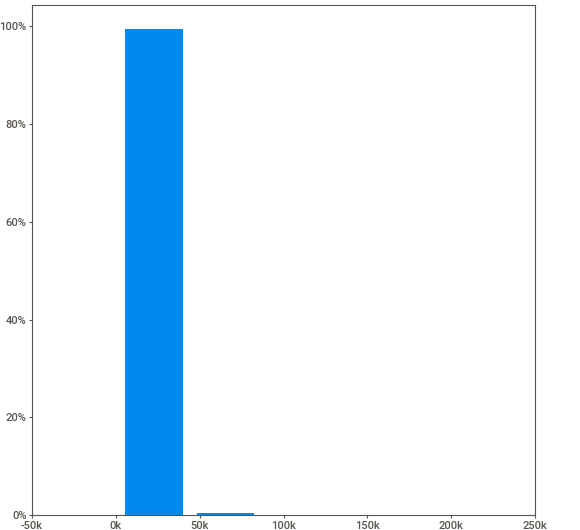
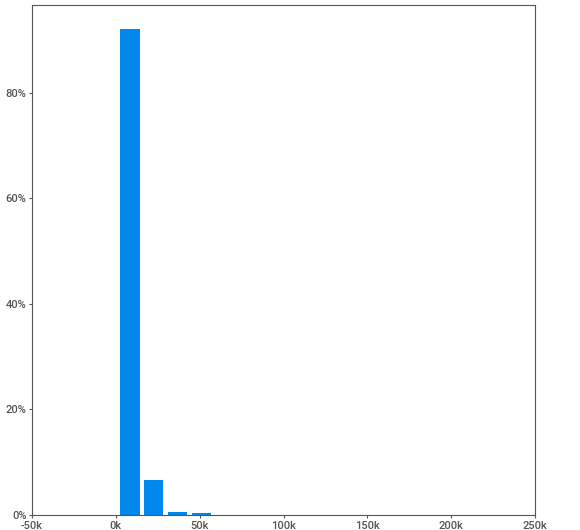
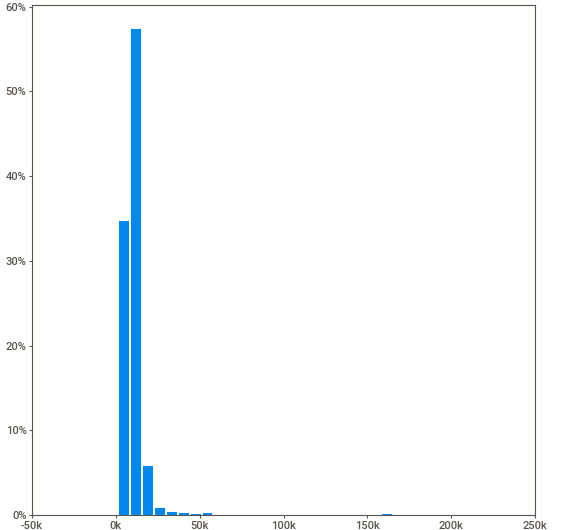
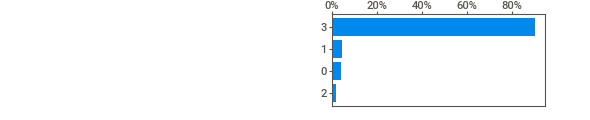
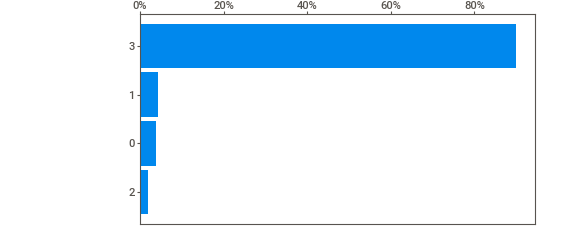
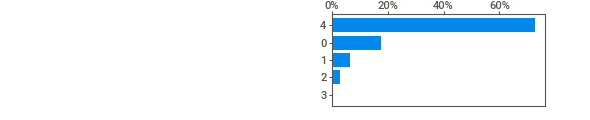
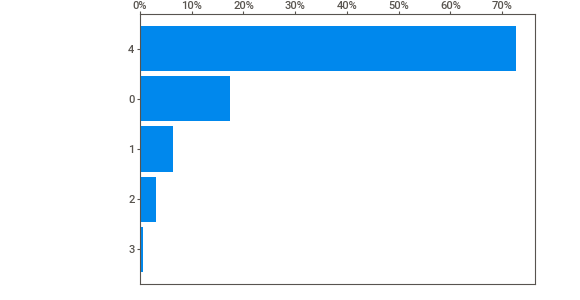
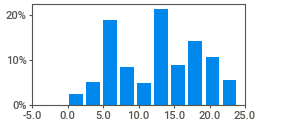
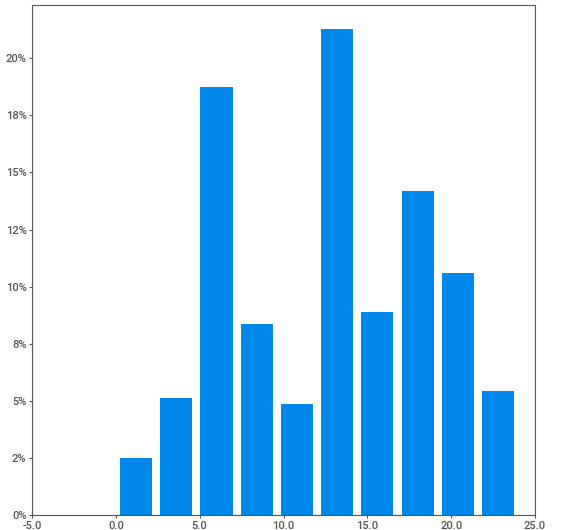
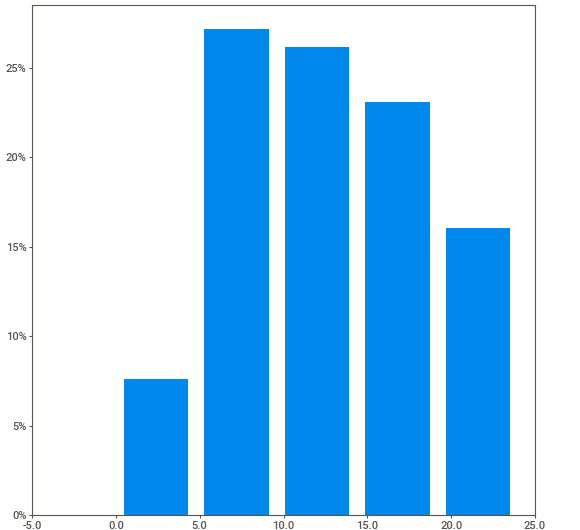
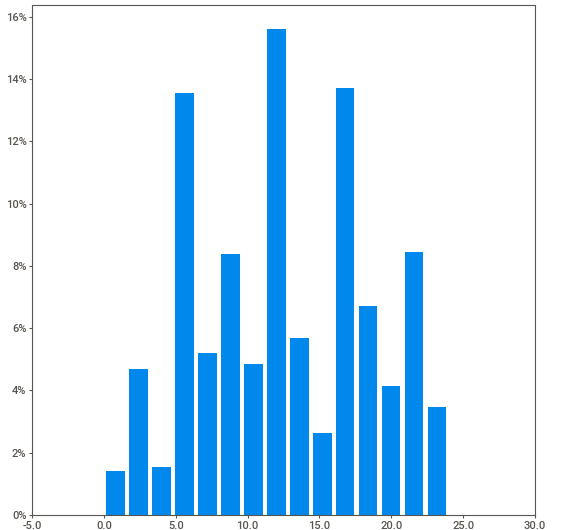
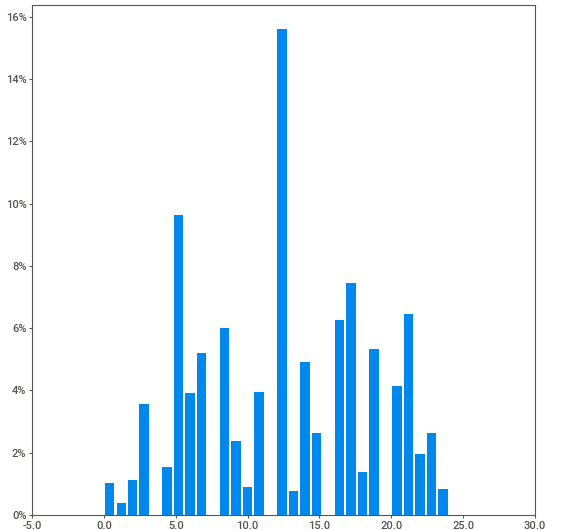
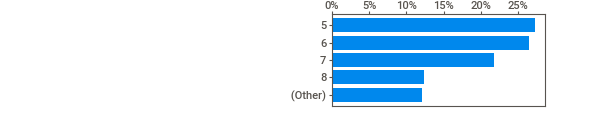
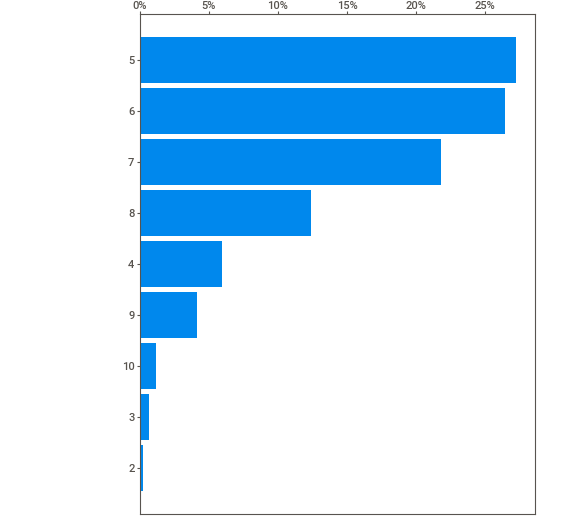
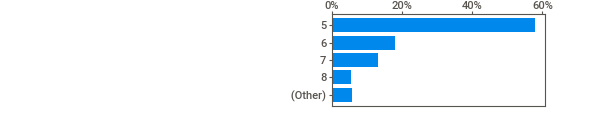
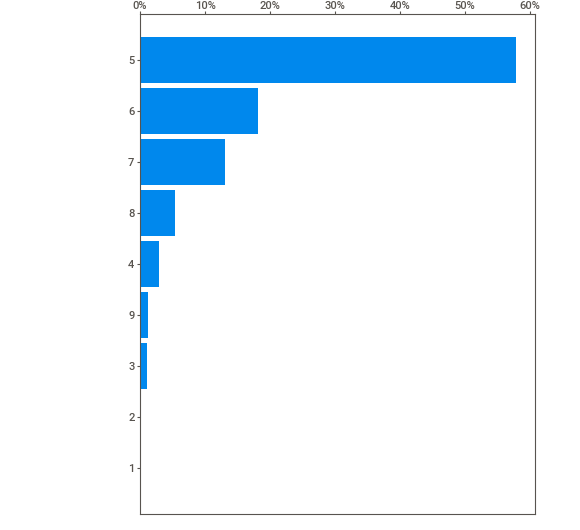
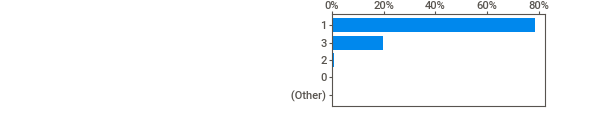
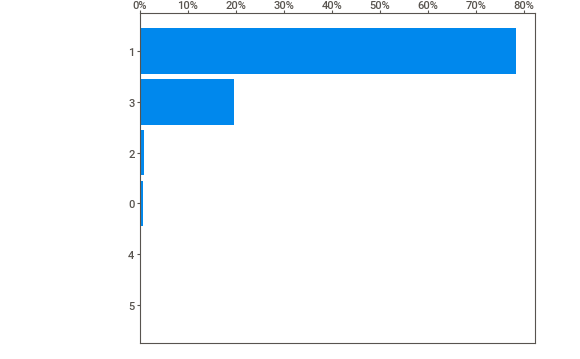
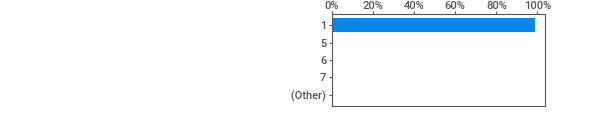
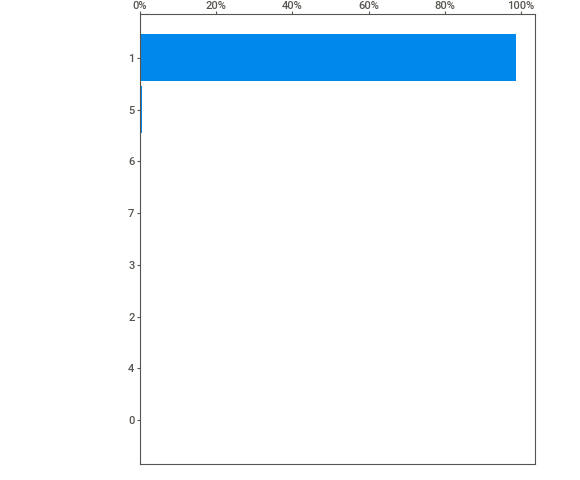
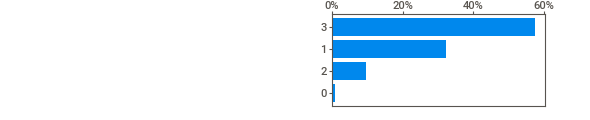
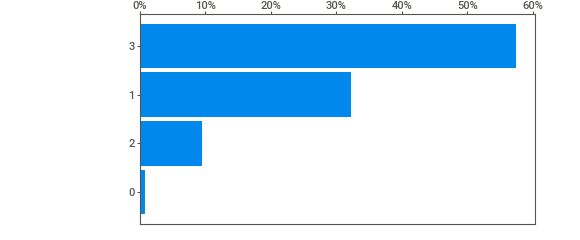
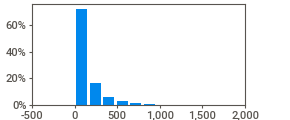
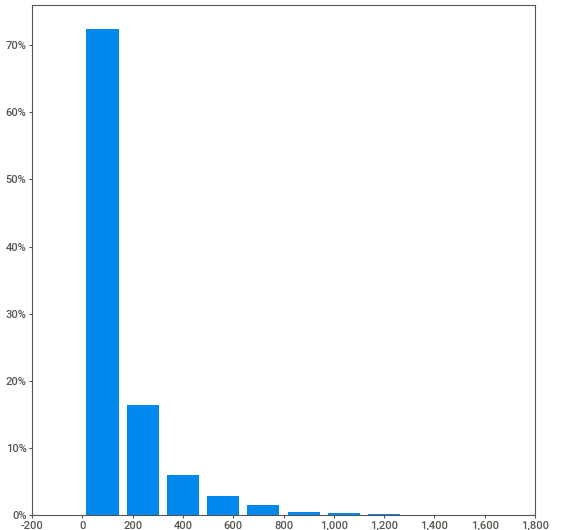
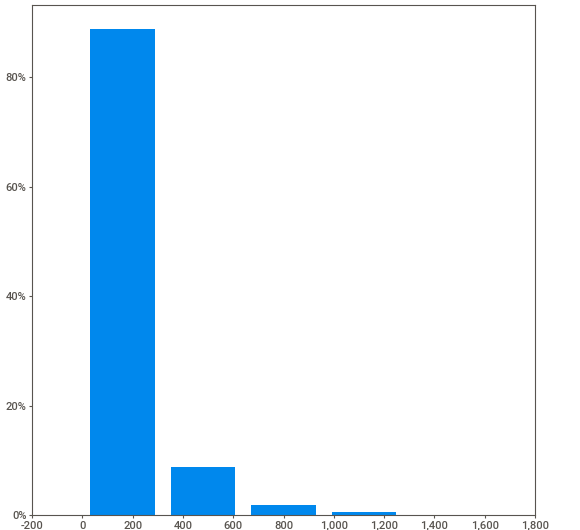
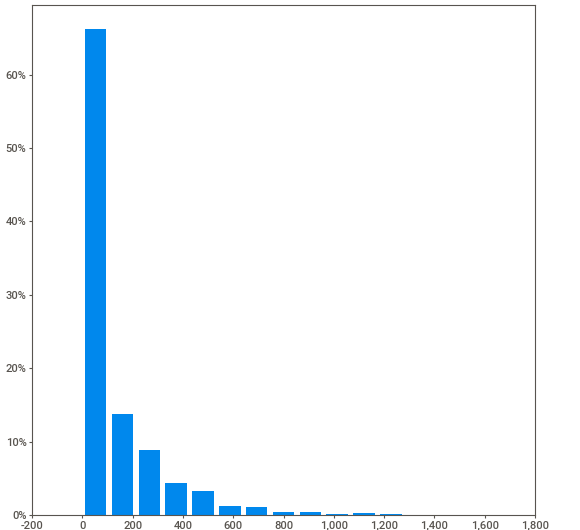
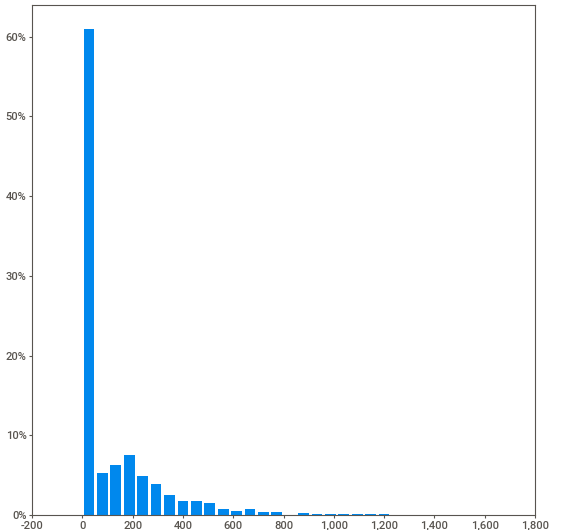
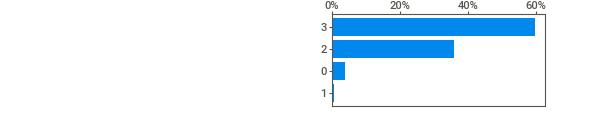
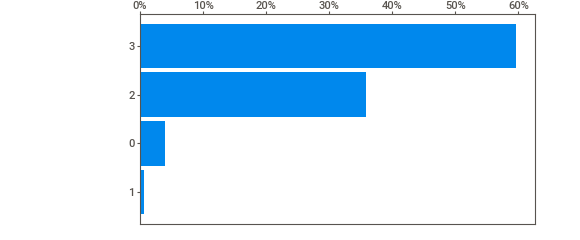
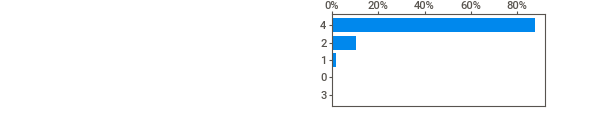
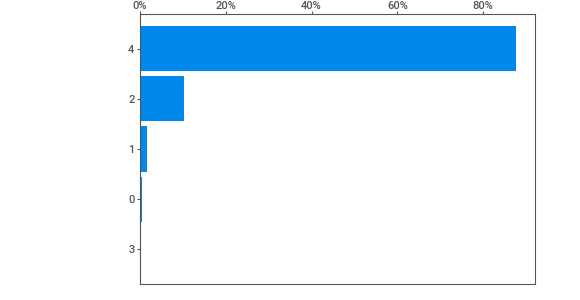
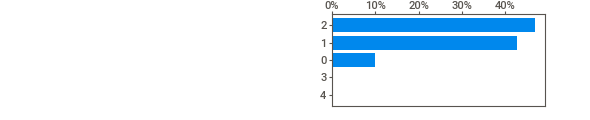
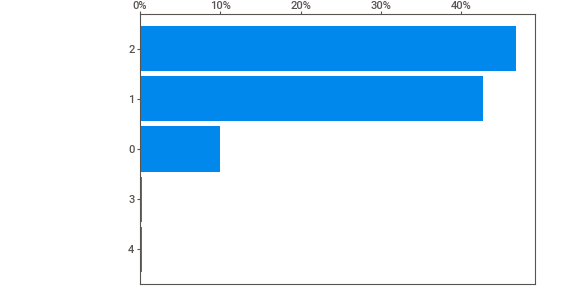
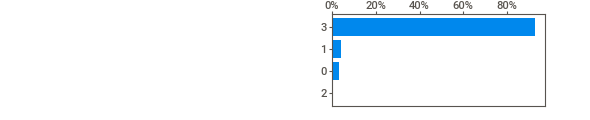
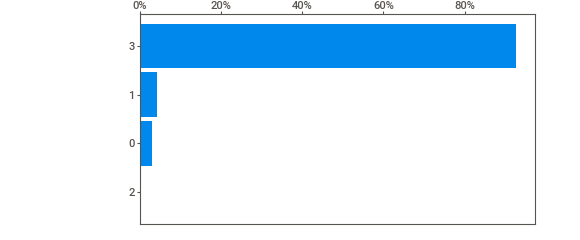
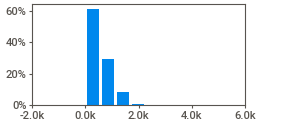
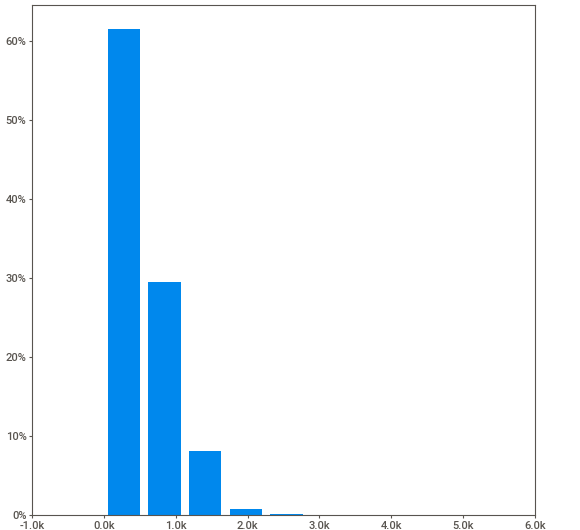
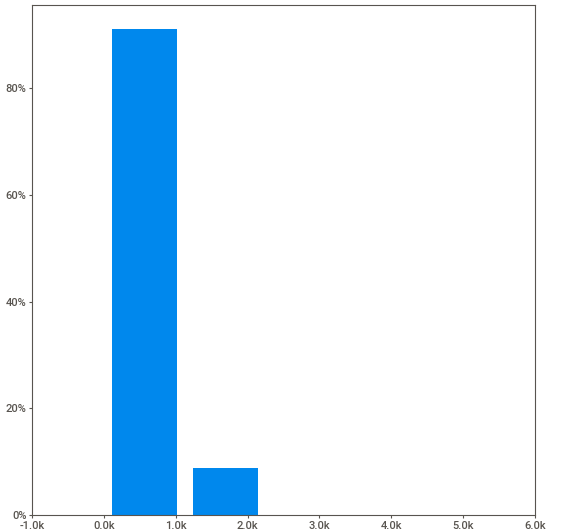
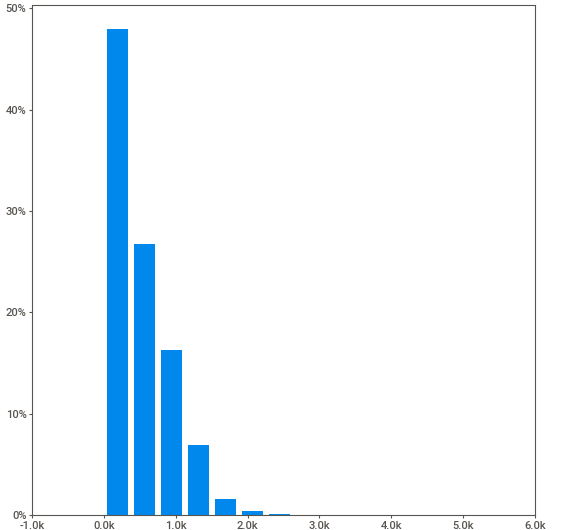
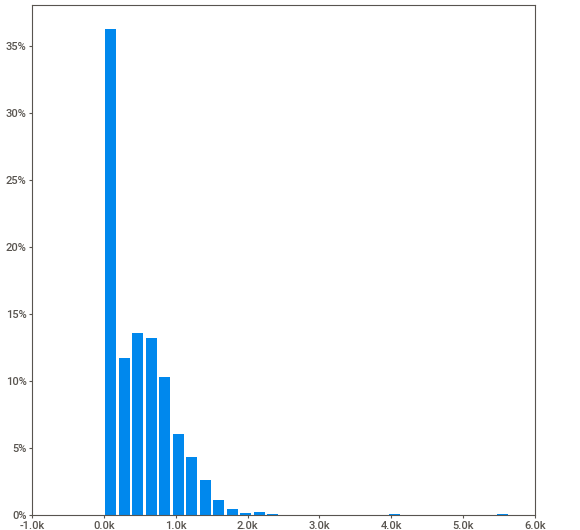
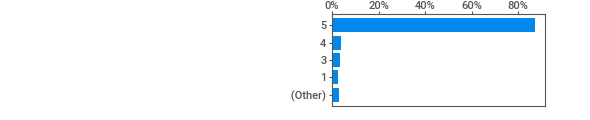
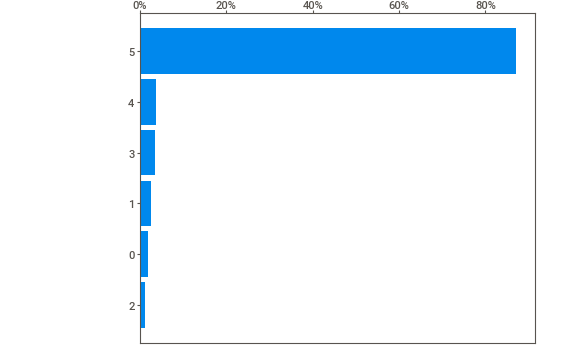
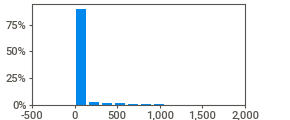
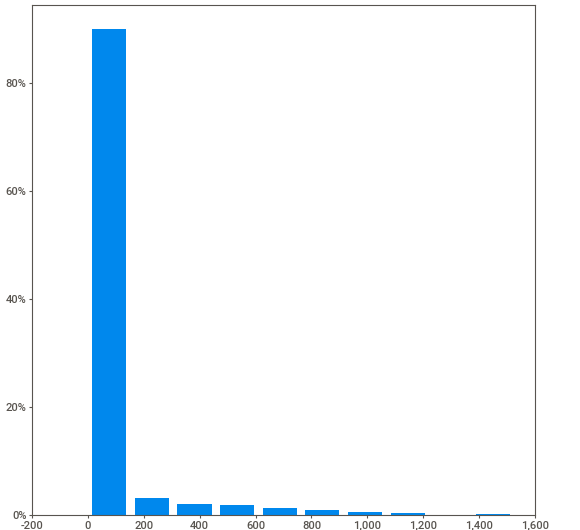
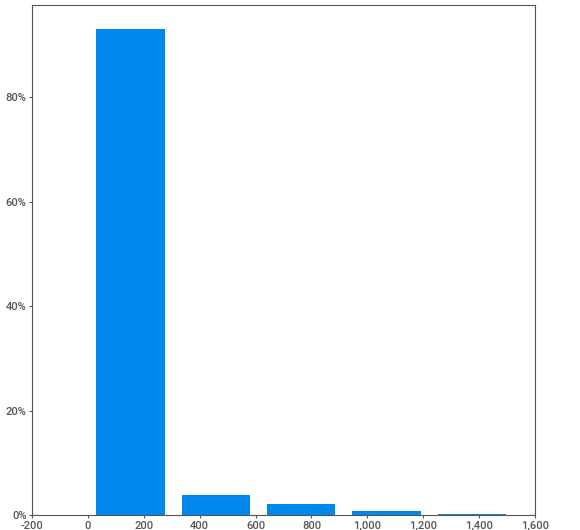
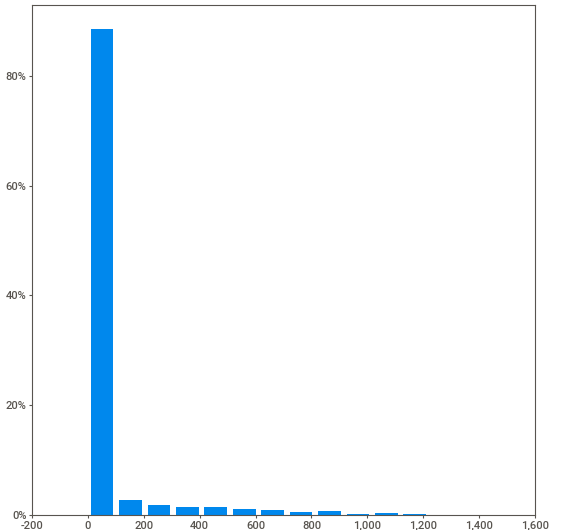
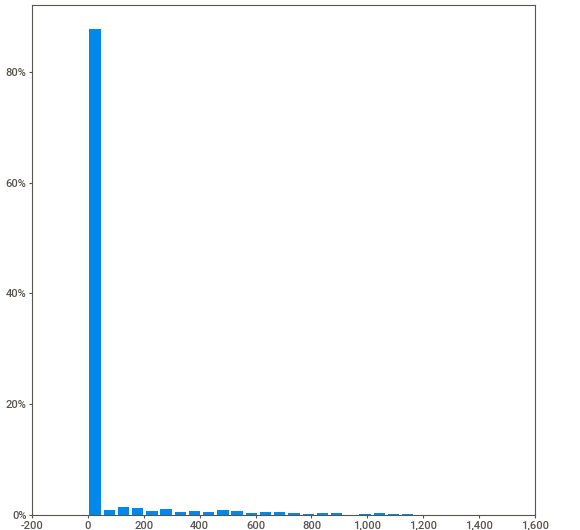
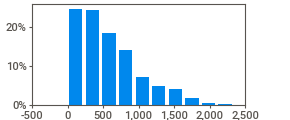
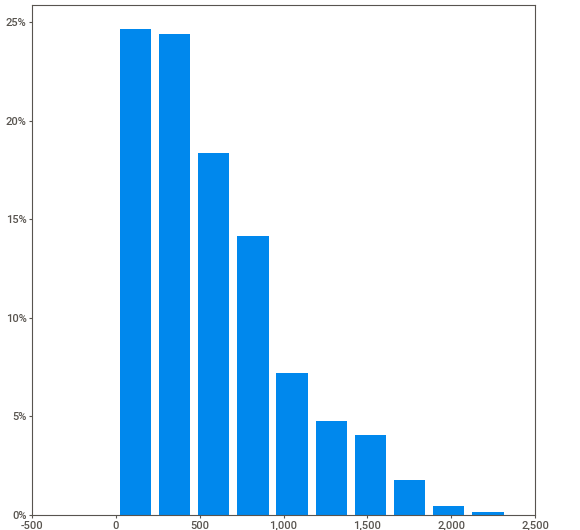
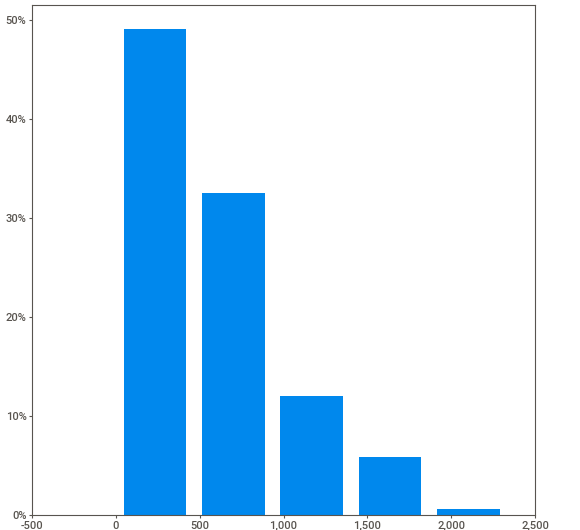
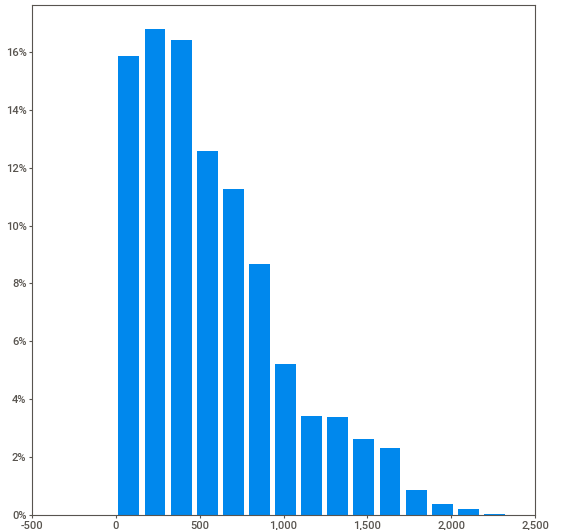
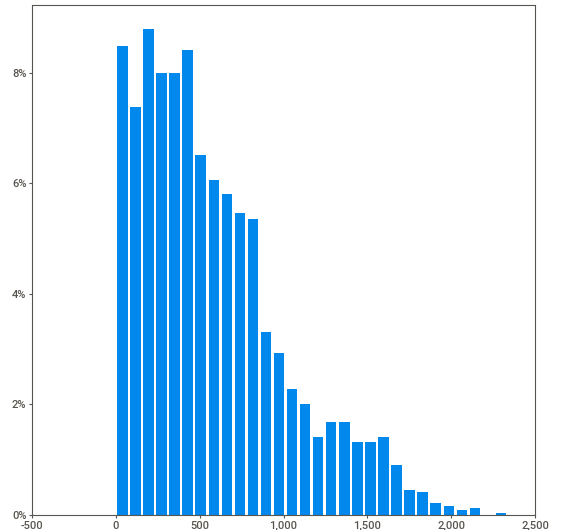
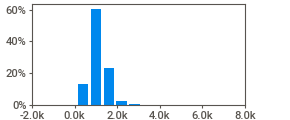
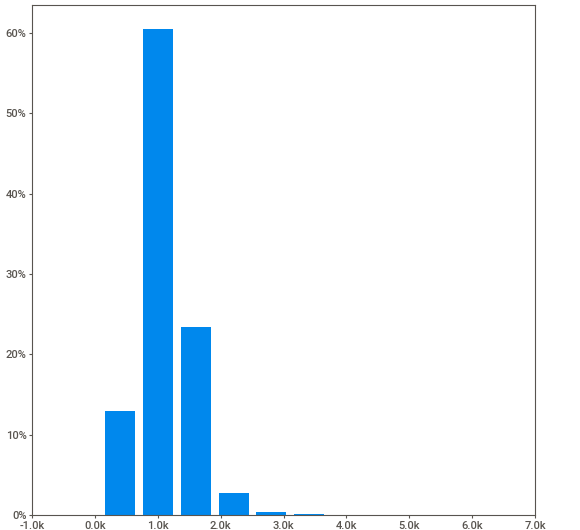
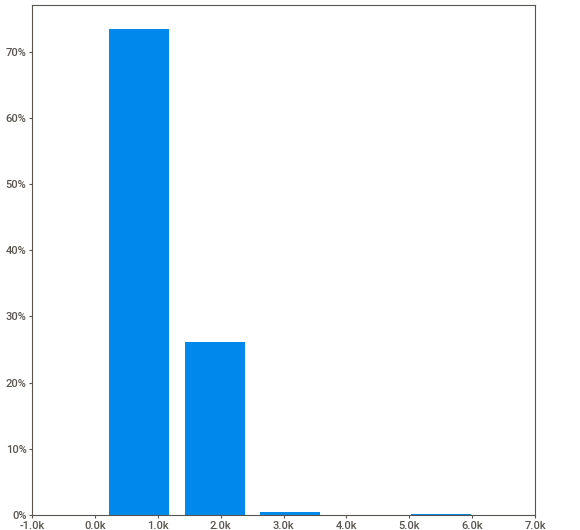
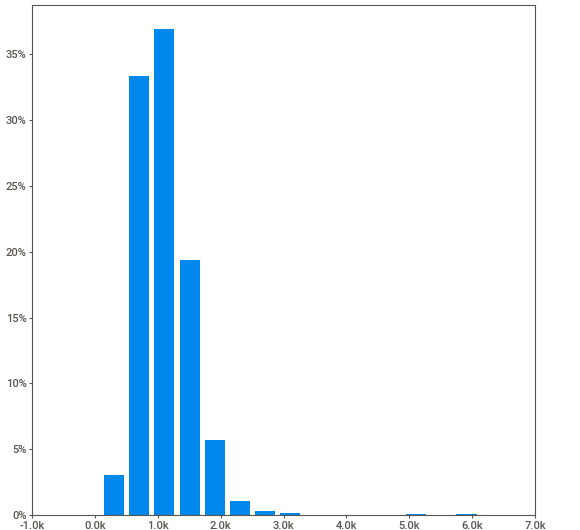
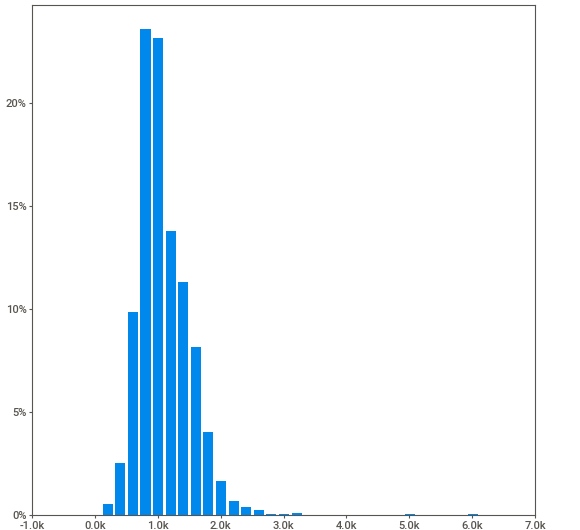
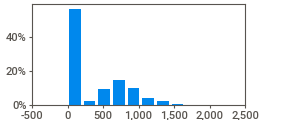
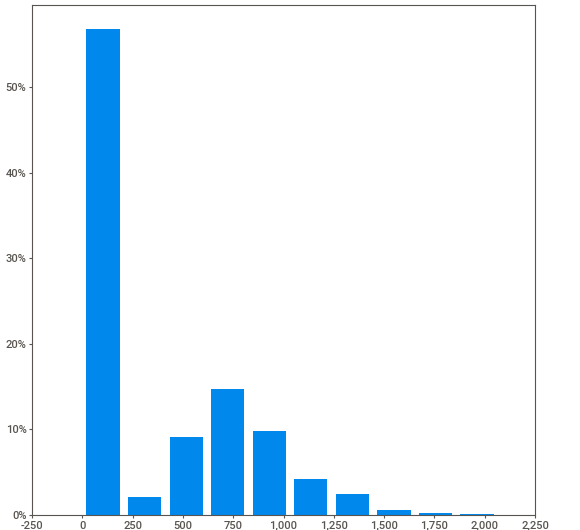
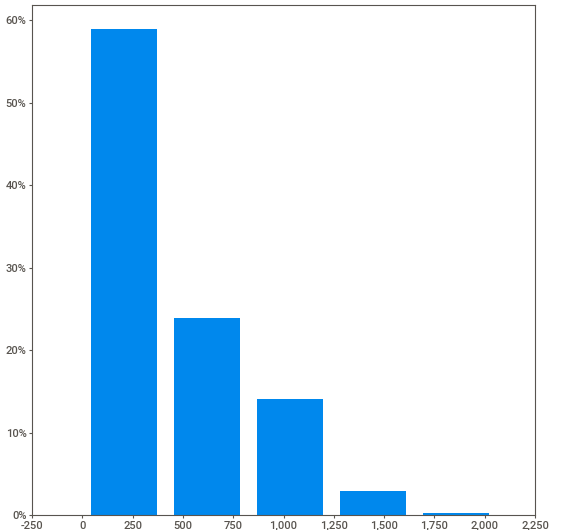
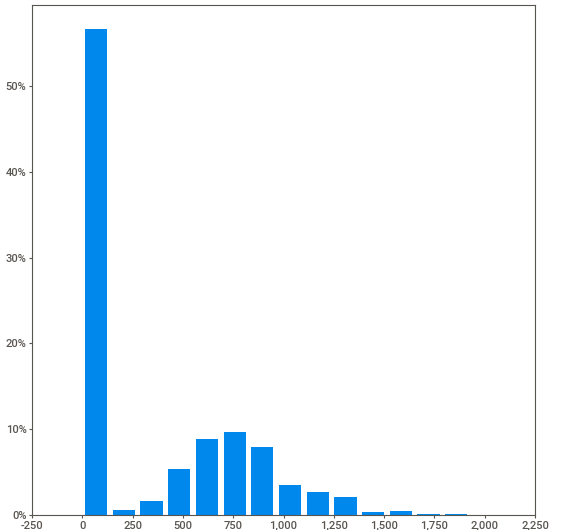
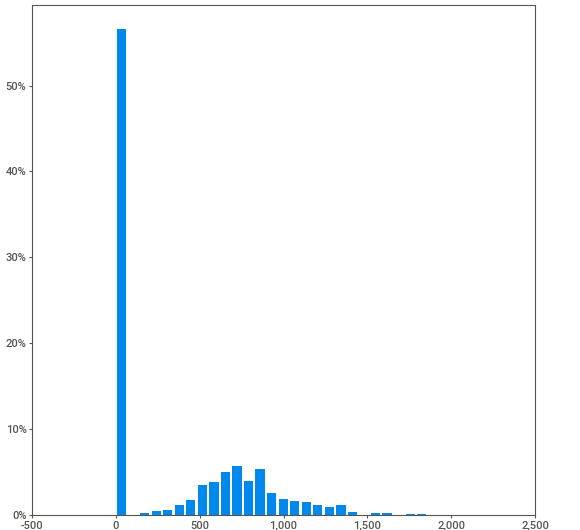
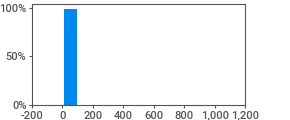
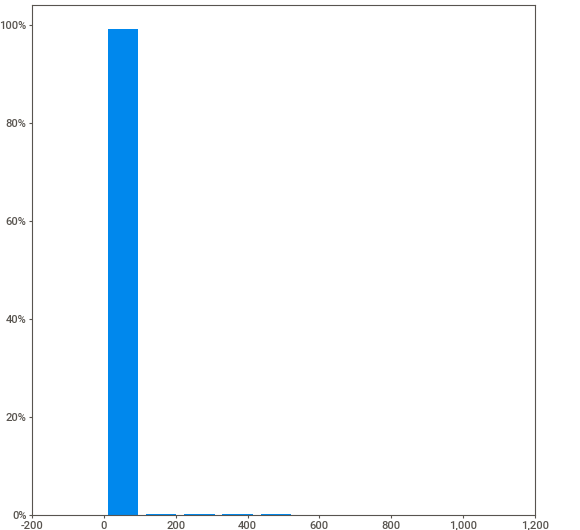
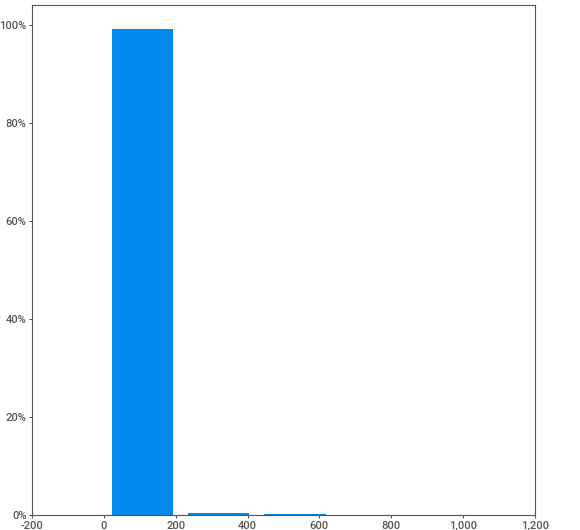
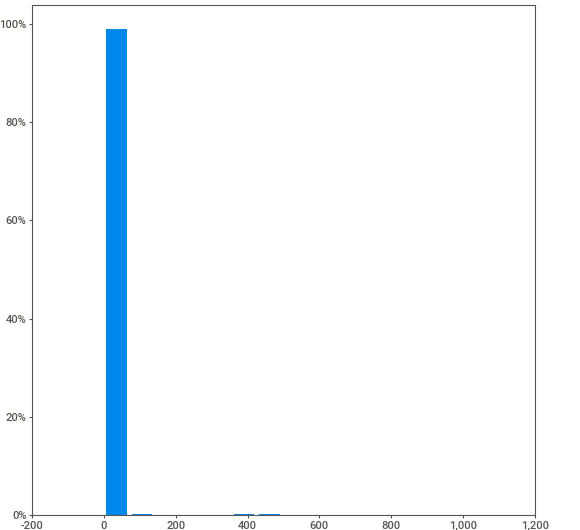
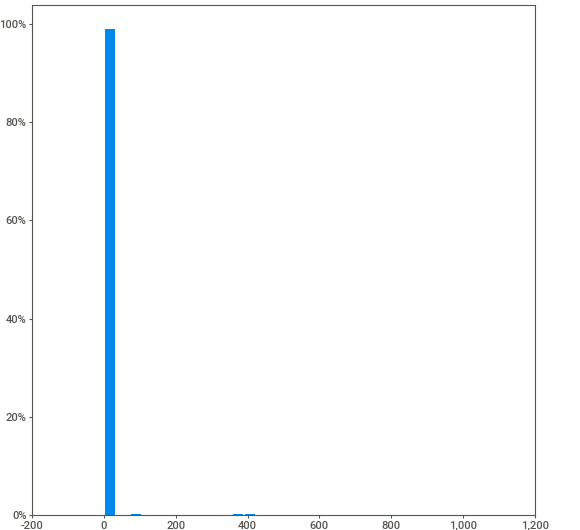
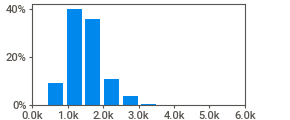
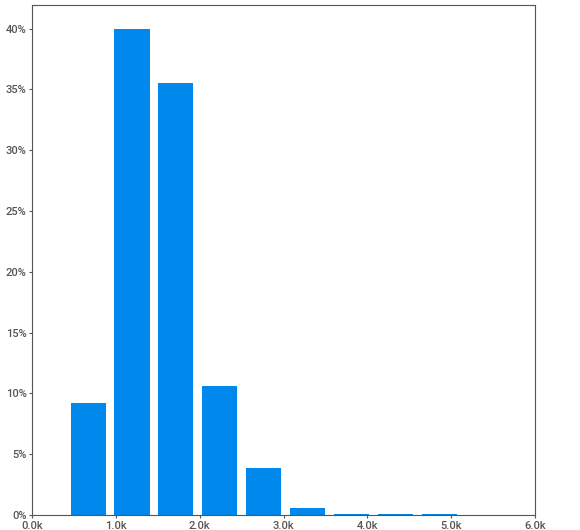
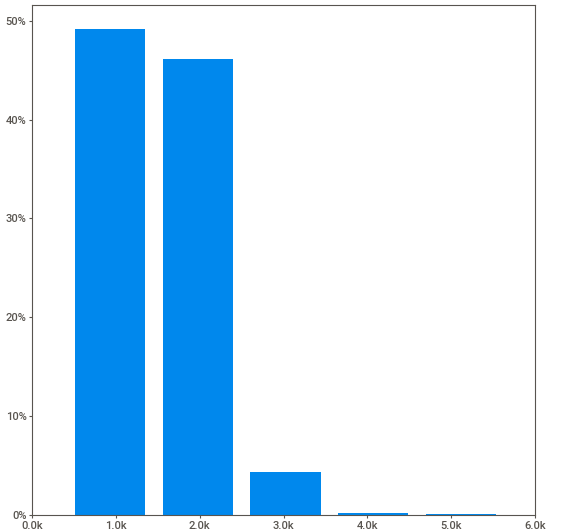
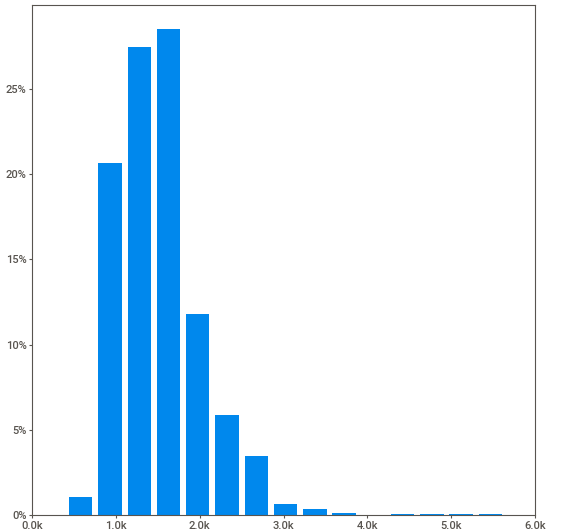
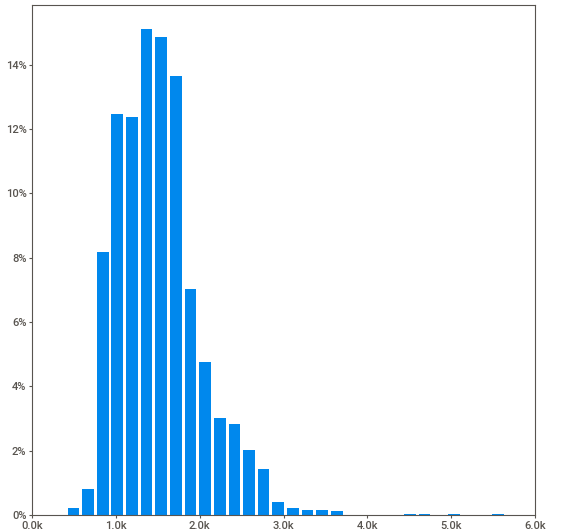
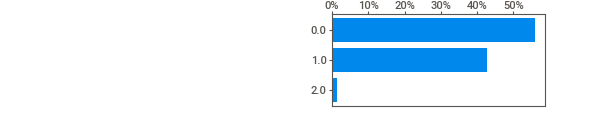
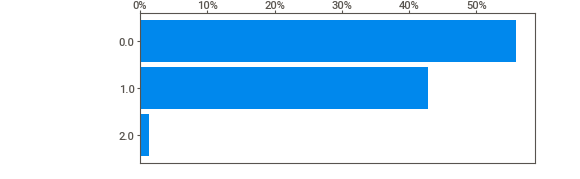
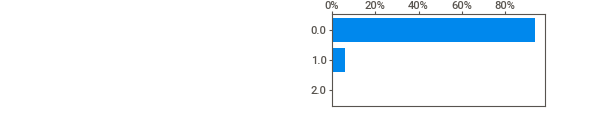
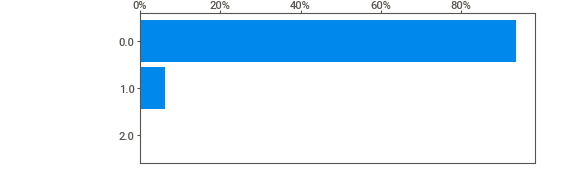
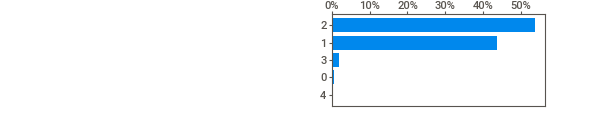
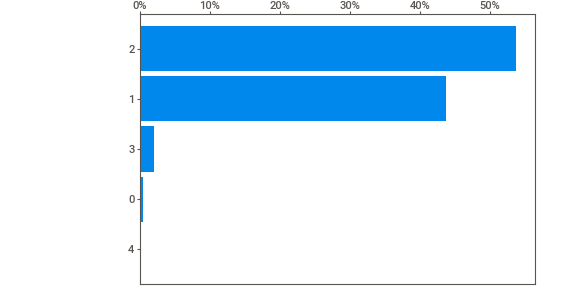
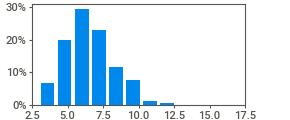
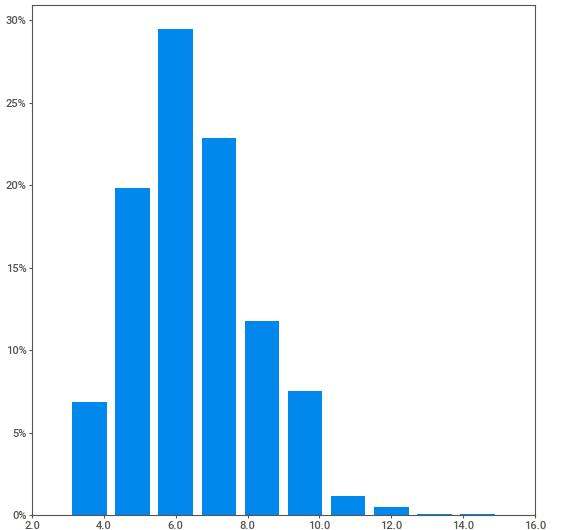
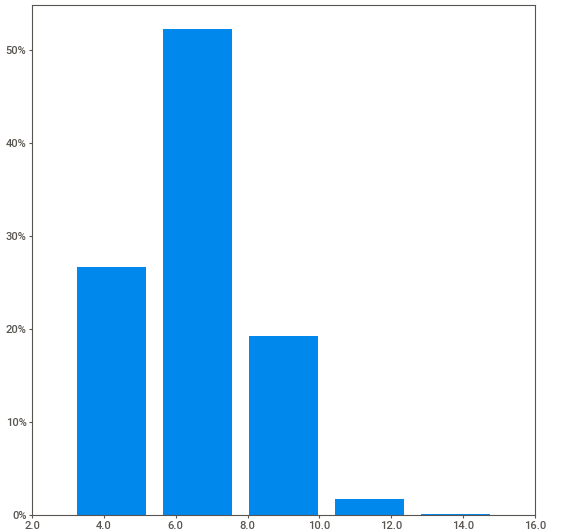
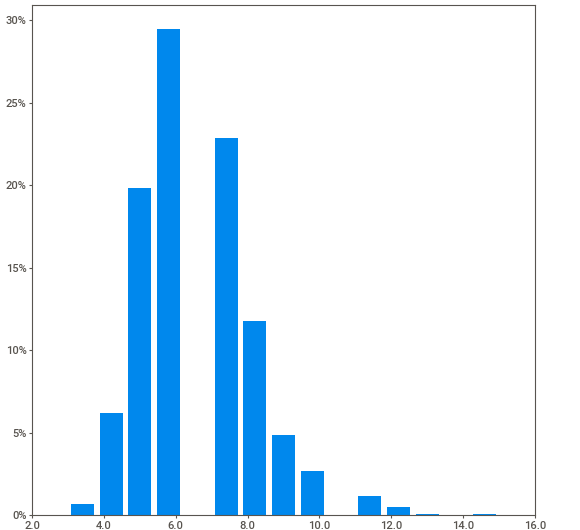
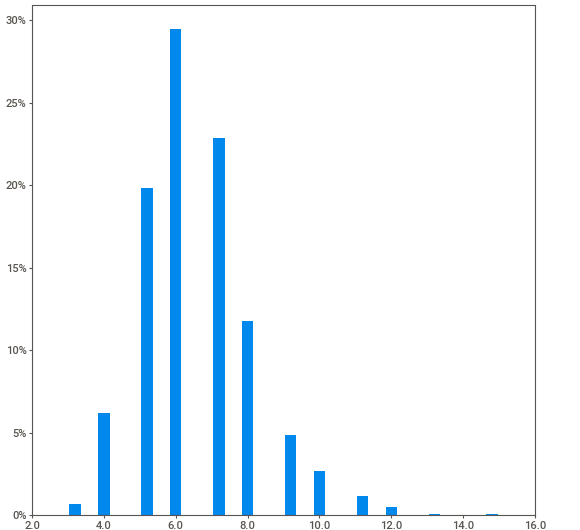
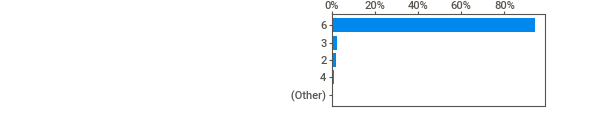
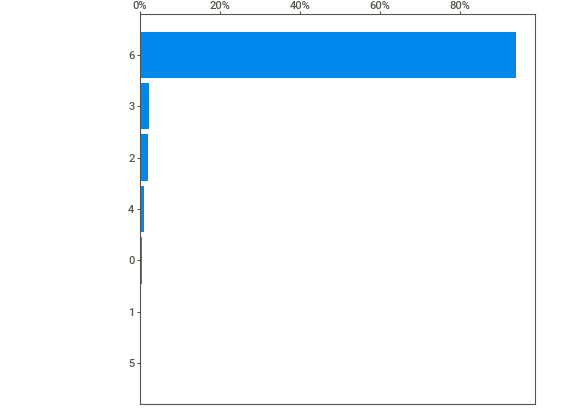
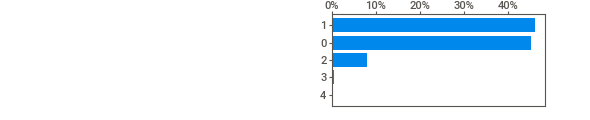
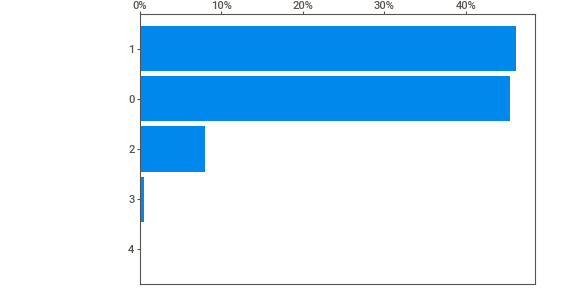
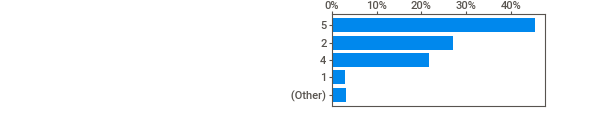
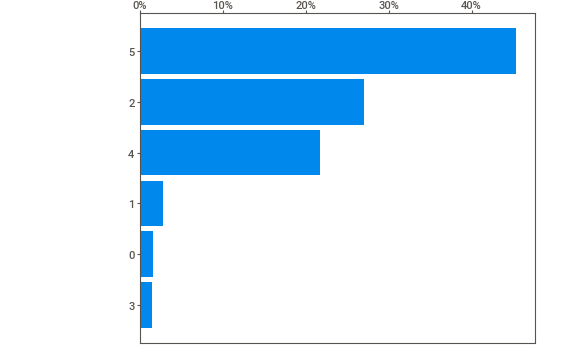
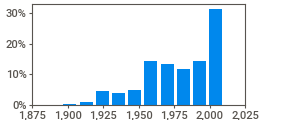
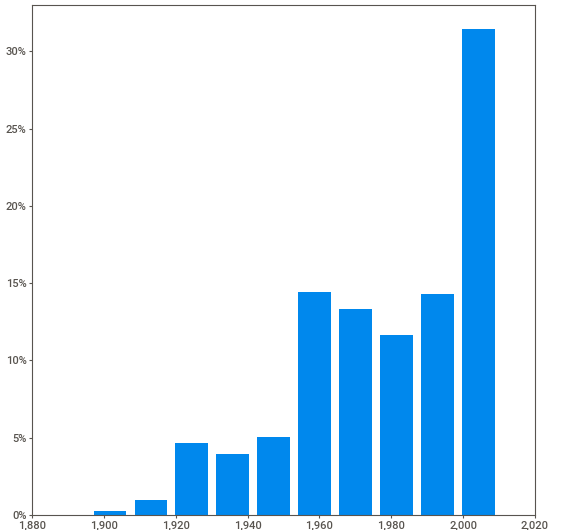
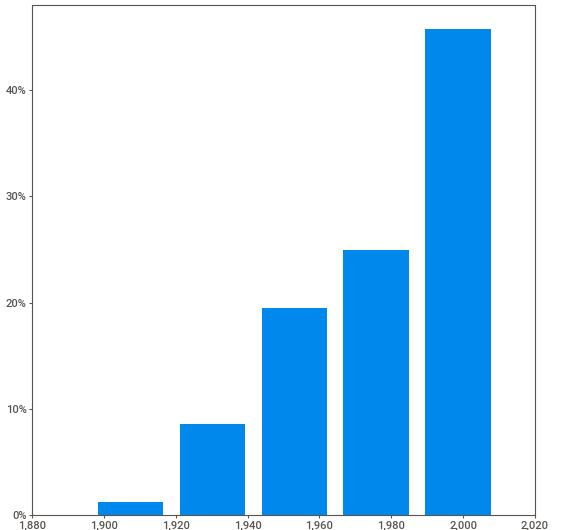
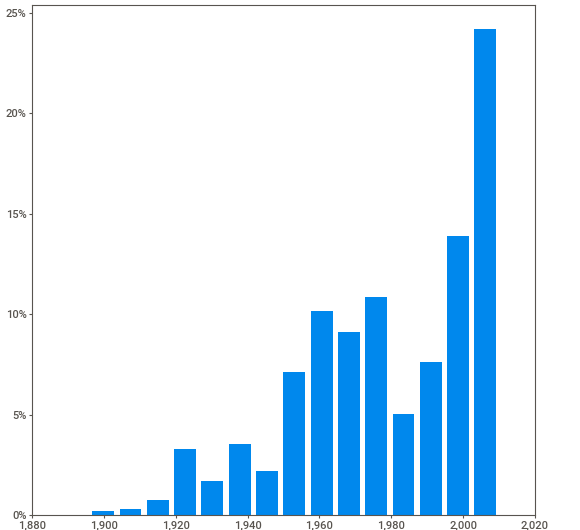
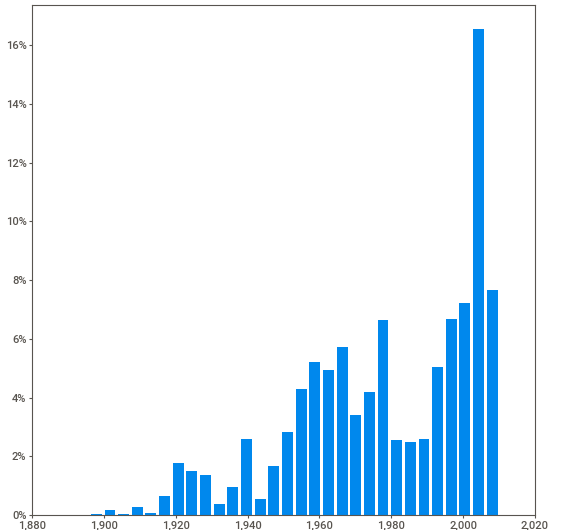
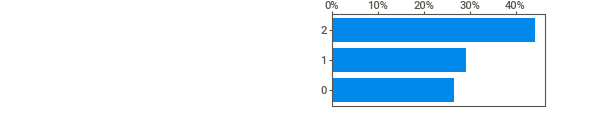
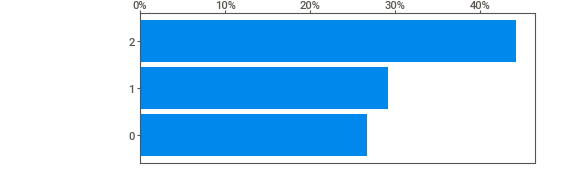
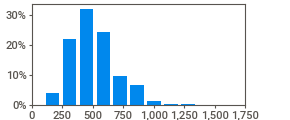
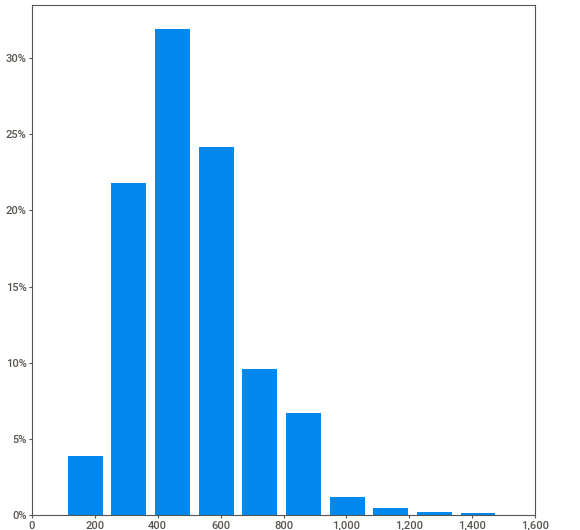
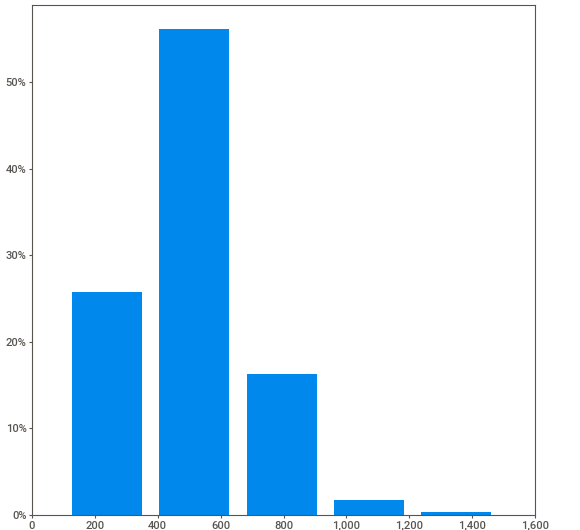
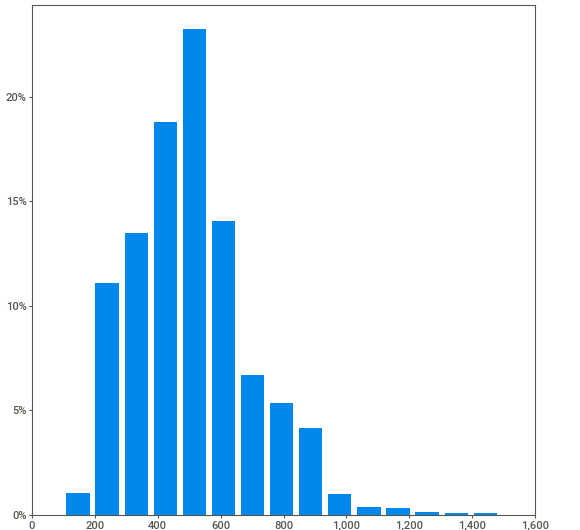
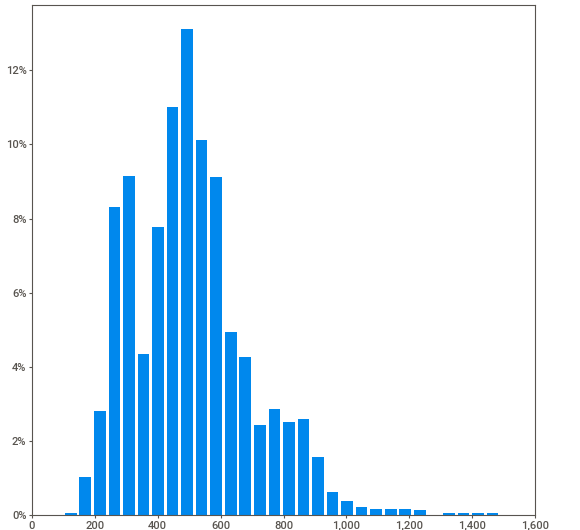
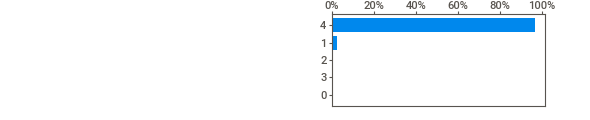
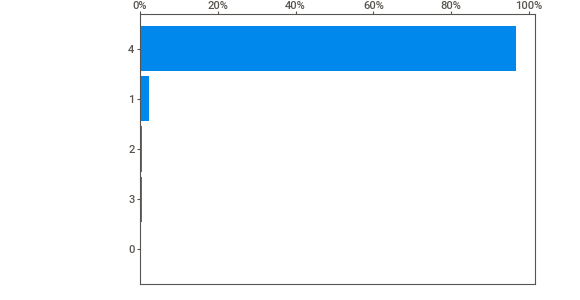
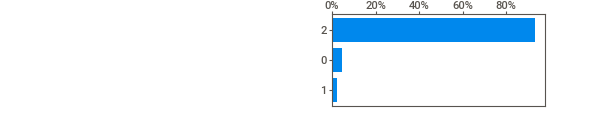
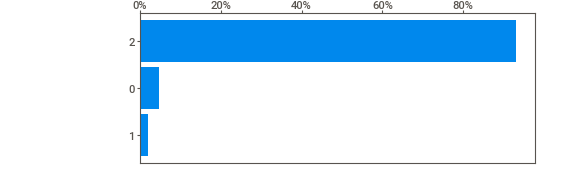
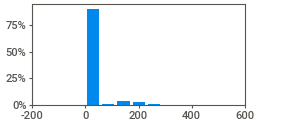
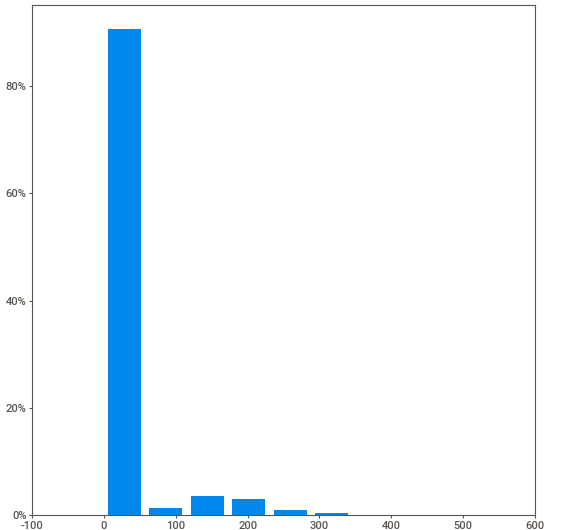
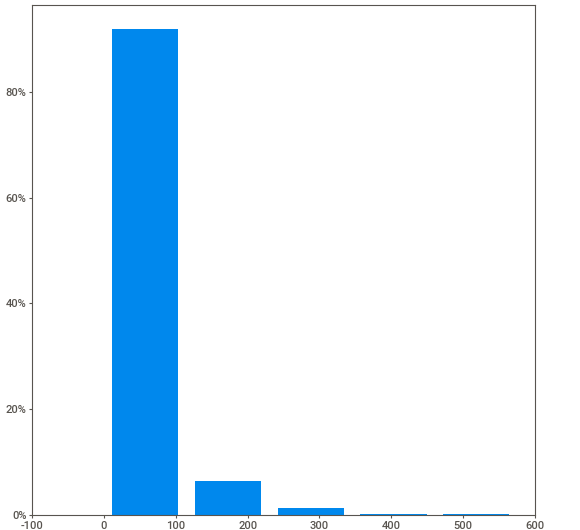
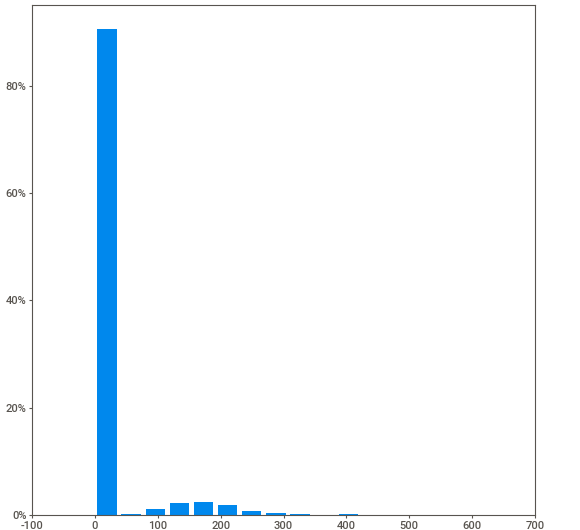
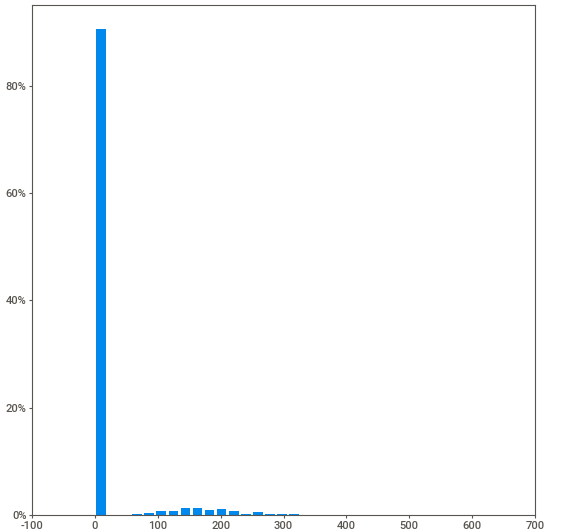
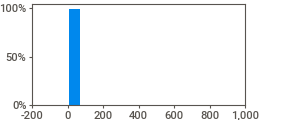
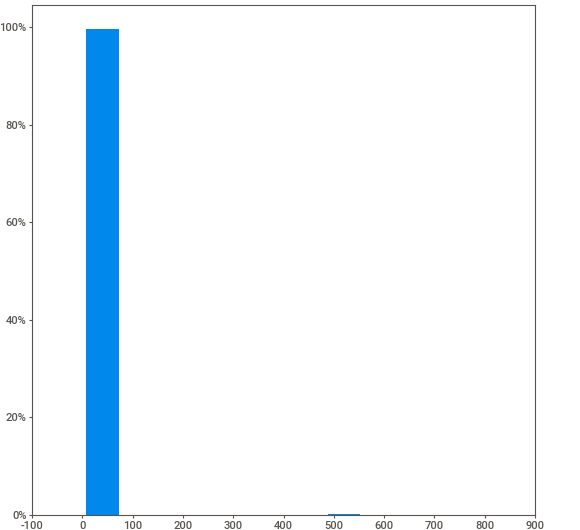
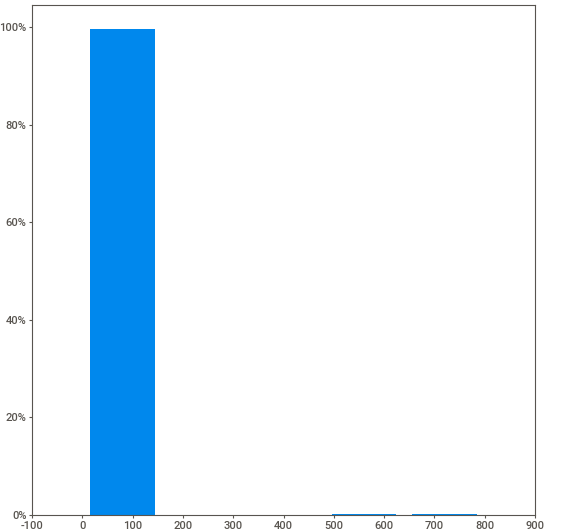
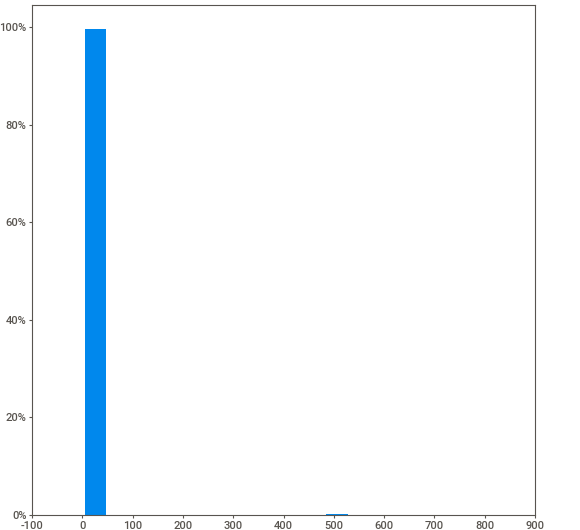
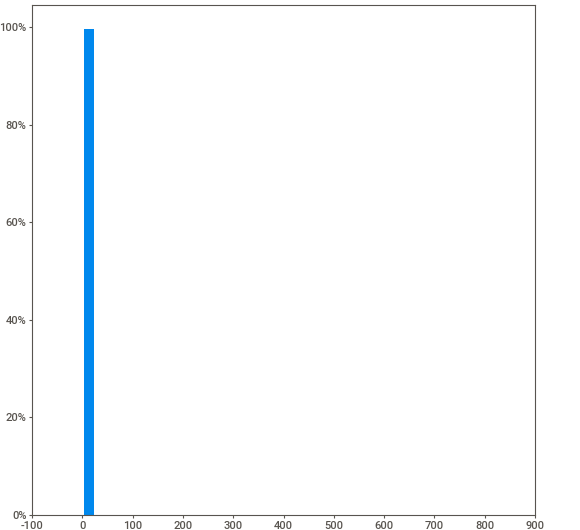
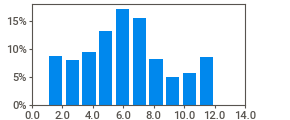
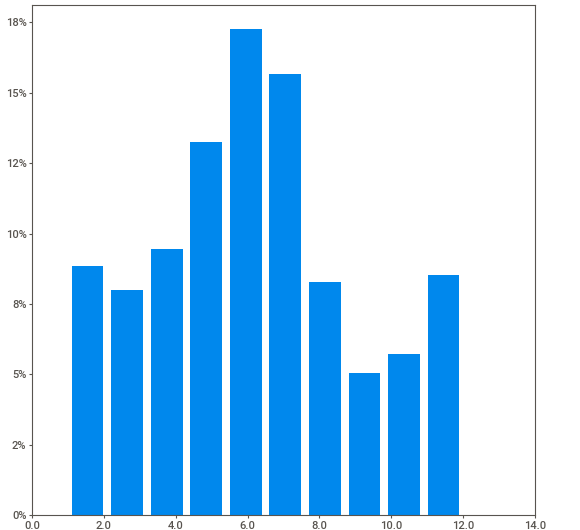
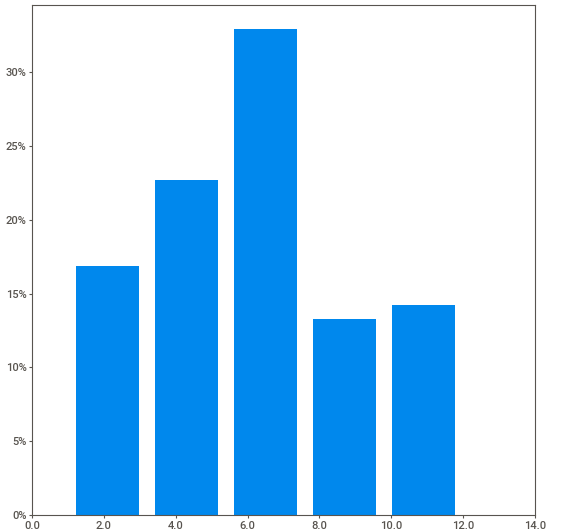
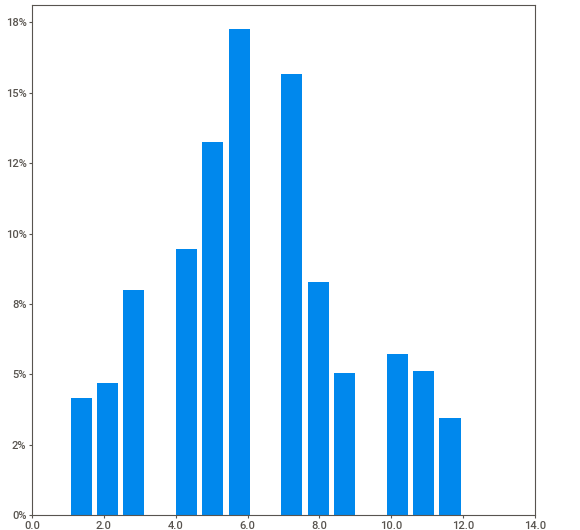
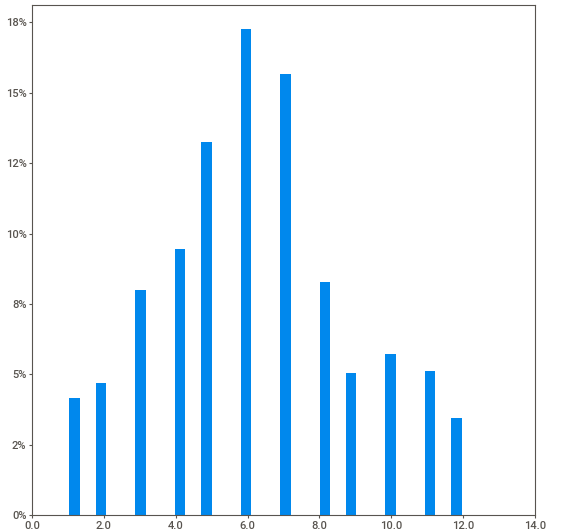
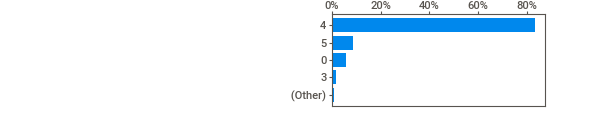
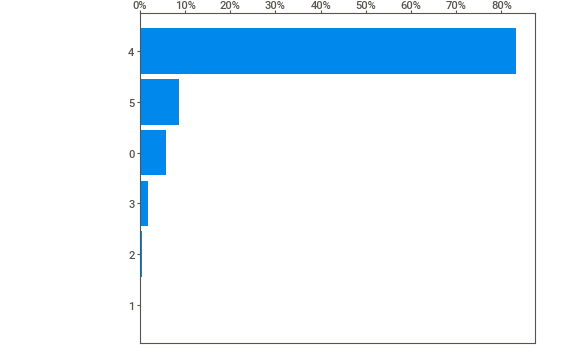
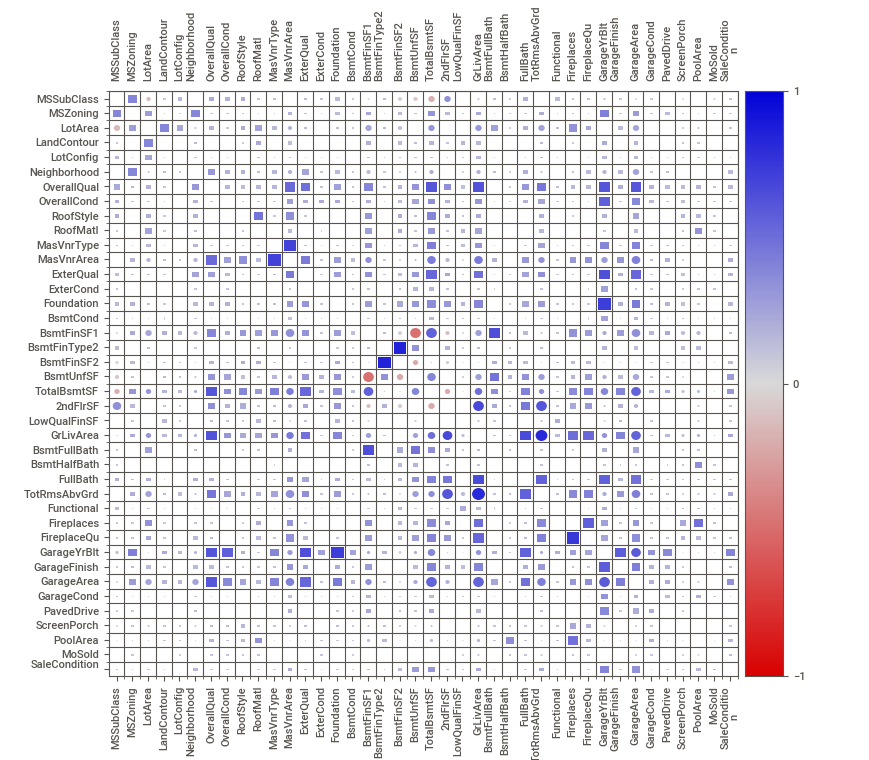
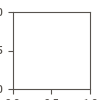

In [59]:
df_report = sv.analyze(df.iloc[:,:-1])
df_report.show_notebook()

<Axes: >

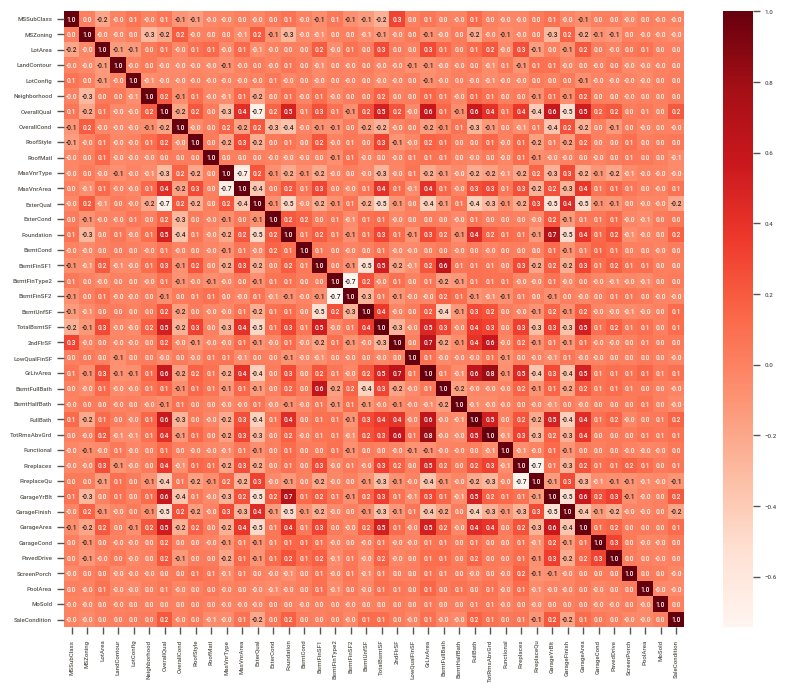

In [60]:
plt.figure(figsize=(10,8))
sns.set_context('paper',font_scale=0.5)
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,fmt=".1f",cmap="Reds")

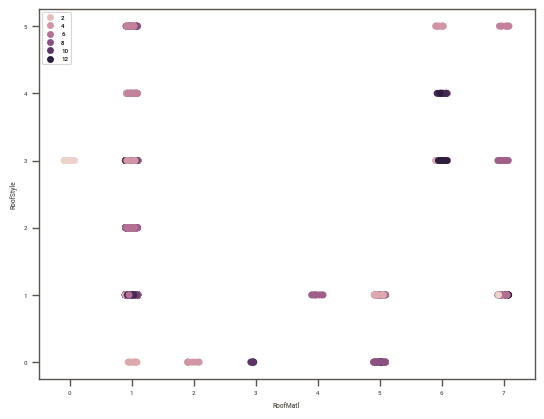

In [61]:
sns.stripplot(data=df, x='RoofMatl', y='RoofStyle',hue='MoSold')
plt.legend()

## Outlier removing

In [64]:
df.head()

,MSSubClass,MSZoning,LotArea,LandContour,LotConfig,Neighborhood,OverallQual,OverallCond,RoofStyle,RoofMatl,...,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,ScreenPorch,PoolArea,MoSold,SaleCondition,SalePrice
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,180921
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,180921
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500


<Axes: >

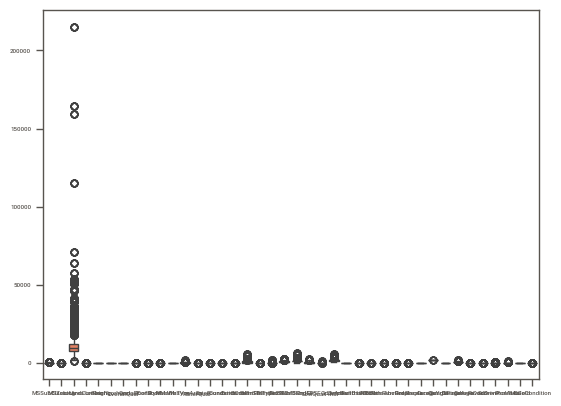

In [63]:
sns.boxplot(df.iloc[:,:-1]) # LotArea

<Axes: ylabel='LotArea'>

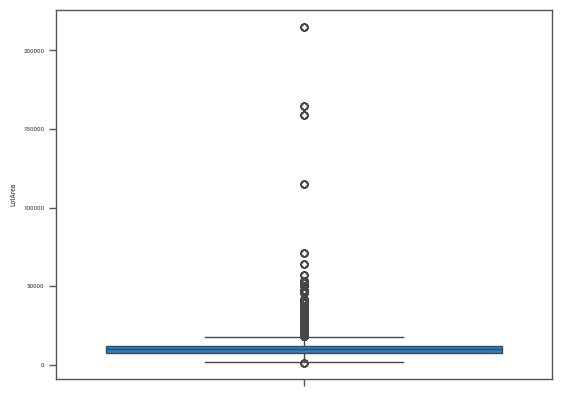

In [65]:
sns.boxplot(df['LotArea'])

In [69]:
selecteed_featurers =['LotArea']
q1 = df[selecteed_featurers].quantile(0.25)
q3 = df[selecteed_featurers].quantile(0.75)
IQR = q3 - q1
th_1 = q1 - (1.5 * IQR)
th_2 = q3 + (1.5 * IQR)

In [70]:
df = df[~((df[selecteed_featurers] < (th_1)) |(df[selecteed_featurers] > (th_2))).any(axis=1)]
df.head()

,MSSubClass,MSZoning,LotArea,LandContour,LotConfig,Neighborhood,OverallQual,OverallCond,RoofStyle,RoofMatl,...,GarageYrBlt,GarageFinish,GarageArea,GarageCond,PavedDrive,ScreenPorch,PoolArea,MoSold,SaleCondition,SalePrice
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,180921
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,180921
0,60,3,8450,3,4,5,7,5,1,1,...,2003.0,1,548.0,4,2,0,0,2,4,208500


<Axes: ylabel='LotArea'>

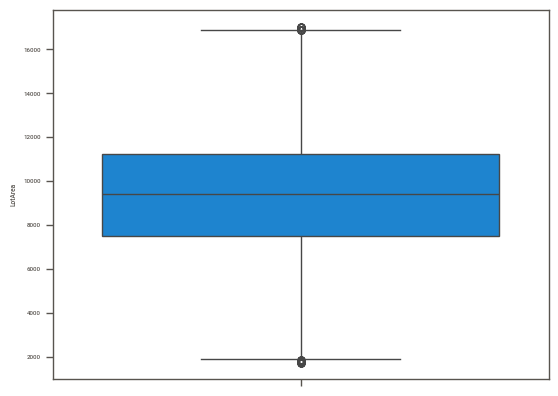

In [71]:
sns.boxplot(df['LotArea'])

##  Model Building and evaluation

In [78]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train , X_test , Y_train , Y_test  = train_test_split(X,Y,random_state=42,test_size=0.2)

In [85]:
def show_score(actual_value , prediction_value):
  MAE_score = metrics.mean_absolute_error(actual_value , prediction_value)
  MSE_score = np.sqrt(metrics.mean_squared_error(actual_value, prediction_value))
  R2_score =  metrics.r2_score(actual_value, prediction_value)
  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
  sns.distplot(actual_value,  color="g", label="Actual Value",hist=False)
  plt.legend()
  print(MAE_score,'\n',MSE_score,'\n',R2_score)

### GradientBoostingRegressor

In [79]:
gbr = GradientBoostingRegressor(n_estimators=500)

In [80]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=500)

In [81]:
gbr_pred  = gbr.predict(X_test)

<ipython-input-85-7e42bee3324f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
<ipython-input-85-7e42bee3324f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual_value,  color="g", label="Actual Value",his

31090.373414593458 
 46567.65995038159 
 0.30734430163763027


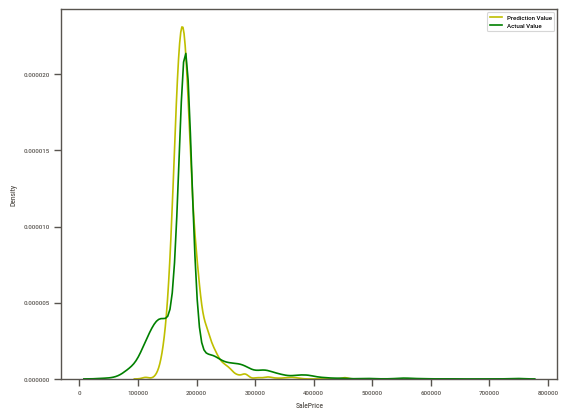

In [86]:
show_score(prediction_value =gbr_pred ,actual_value =Y_test)

### XGBRegressor

In [94]:
xgbr = XGBRegressor()

In [95]:
param_grid = {
              'n_estimators': [500,250],
              'max_depth': [5,10],
              'learning_rate': [1.0,0.1],
             'random_state' : [0,42]
}

In [96]:
xgbr_model = GridSearchCV(estimator=xgbr, param_grid=param_grid, n_jobs=-1, cv=3)

In [97]:
xgbr_model.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1], 'max_depth': [5, 10],
                         'n_estimators': [500, 250], 'random_state': [0, 42]})

In [98]:
xgbr_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'random_state': 0}

In [99]:
xgbregressor = XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=500,random_state=0)

In [100]:
xgbregressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [101]:
xgbr_pred  = xgbregressor.predict(X_test)

<ipython-input-85-7e42bee3324f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prediction_value, color="y", label="Prediction Value",hist=False)
<ipython-input-85-7e42bee3324f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(actual_value,  color="g", label="Actual Value",his

31397.335992742046 
 44747.500857509425 
 0.36043284622298133


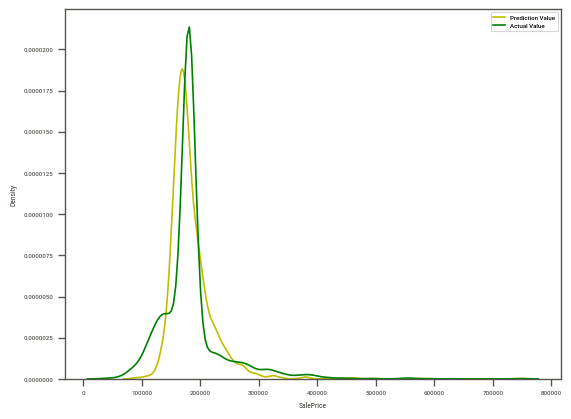

In [102]:
show_score(prediction_value =xgbr_pred ,actual_value =Y_test)

## The main problem of this project is the handling of missing data and it is presented on the kaggle website ,in this project there are different ways to solve this problem according to the type of data